In [4]:
import os
import pandas as pd
import numpy as np
import pickle
import sklearn as sk
import catboost


# Подготовка данных

In [9]:
df = pd.read_pickle('/home/mainuser/lab_project/data/clean_data.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1819 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   battery_power        1819 non-null   int16   
 1   blue                 1819 non-null   category
 2   clock_speed          1819 non-null   float16 
 3   dual_sim             1819 non-null   category
 4   fc                   1819 non-null   int16   
 5   four_g               1819 non-null   category
 6   int_memory           1819 non-null   int16   
 7   m_dep                1819 non-null   float16 
 8   mobile_wt            1819 non-null   int16   
 9   n_cores              1819 non-null   int16   
 10  pc                   1819 non-null   int16   
 11  px_height            1819 non-null   int16   
 12  px_width             1819 non-null   int16   
 13  ram                  1819 non-null   int16   
 14  sc_h                 1819 non-null   int16   
 15  sc_w                 1819 

In [10]:
X_train,X_test,Y_train,Y_test = sk.model_selection.train_test_split(df.drop('price_range',axis=1),df['price_range'],test_size=0.25,random_state=12)

In [11]:
cat_features = X_train.select_dtypes(include=['category']).columns.to_list()
cat_features

['blue',
 'dual_sim',
 'four_g',
 'three_g',
 'touch_screen',
 'wifi',
 'high_speed_ethernet']

In [12]:
num_features = X_train.select_dtypes(include=['number']).columns.to_list()
num_features

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

# Pipeline

## Transform

In [13]:
s_scaler = sk.preprocessing.StandardScaler()
t_encoder = sk.preprocessing.TargetEncoder()
classifier = sk.ensemble.RandomForestClassifier(n_estimators=100,max_depth=None,max_features='sqrt')
catboost_classifier = catboost.CatBoostClassifier()

In [9]:
preprocessor = sk.compose.ColumnTransformer(transformers=[('num',s_scaler,num_features),('cat',t_encoder,cat_features),],remainder='drop')

In [10]:
pipeline = sk.pipeline.Pipeline(steps=[('preprocessor',preprocessor),('model',classifier)])

In [11]:
pipeline.fit(X_train,Y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [12]:
Y_predicted = pipeline.predict(X_test)
metrics = {}
metrics['precision']=sk.metrics.precision_score(Y_test,Y_predicted,average='macro')
metrics['recall']=sk.metrics.recall_score(Y_test,Y_predicted,average='macro')
metrics['f1_score']=sk.metrics.f1_score(Y_test,Y_predicted,average='macro')
Y_predicted_proba = pipeline.predict_proba(X_test)
metrics['roc_auc']=sk.metrics.roc_auc_score(Y_test,Y_predicted_proba,multi_class='ovr')
metrics

{'precision': 0.8208359341511919,
 'recall': 0.8240432242587414,
 'f1_score': 0.8213373286278509,
 'roc_auc': 0.9635077074874085}

### Catboost

In [ ]:
catboost_pipeline = sk.pipeline.Pipeline(steps=[('preprocessor',preprocessor),('model',catboost_classifier)])

In [ ]:
catboost_pipeline.fit(X_train,Y_train)

Learning rate set to 0.080389
0:	learn: 1.3019631	total: 9.24ms	remaining: 9.23s
1:	learn: 1.2043291	total: 13.1ms	remaining: 6.52s
2:	learn: 1.1377281	total: 19.6ms	remaining: 6.5s
3:	learn: 1.0651502	total: 20.9ms	remaining: 5.2s
4:	learn: 1.0087048	total: 22ms	remaining: 4.39s
5:	learn: 0.9591929	total: 23.3ms	remaining: 3.86s
6:	learn: 0.9070073	total: 24.6ms	remaining: 3.5s
7:	learn: 0.8722377	total: 26.3ms	remaining: 3.26s
8:	learn: 0.8388302	total: 28.9ms	remaining: 3.18s
9:	learn: 0.8000402	total: 30.7ms	remaining: 3.04s
10:	learn: 0.7743306	total: 32.1ms	remaining: 2.89s
11:	learn: 0.7434260	total: 36.1ms	remaining: 2.97s
12:	learn: 0.7137948	total: 37.4ms	remaining: 2.84s
13:	learn: 0.6956233	total: 38.8ms	remaining: 2.73s
14:	learn: 0.6730730	total: 39.9ms	remaining: 2.62s
15:	learn: 0.6537863	total: 41.5ms	remaining: 2.55s
16:	learn: 0.6353427	total: 43.6ms	remaining: 2.52s
17:	learn: 0.6166383	total: 45.2ms	remaining: 2.47s
18:	learn: 0.5964248	total: 46.7ms	remaining: 2.4

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
Y_catboost_predicted = catboost_pipeline.predict(X_test)
catboost_metrics = {}
catboost_metrics['precision']=sk.metrics.precision_score(Y_test,Y_catboost_predicted,average='macro')
catboost_metrics['recall']=sk.metrics.recall_score(Y_test,Y_catboost_predicted,average='macro')
catboost_metrics['f1_score']=sk.metrics.f1_score(Y_test,Y_catboost_predicted,average='macro')
Y_catboost_predicted_proba = pipeline.predict_proba(X_test)
catboost_metrics['roc_auc']=sk.metrics.roc_auc_score(Y_test,Y_catboost_predicted_proba,multi_class='ovr')
catboost_metrics

{'precision': 0.935737812911726,
 'recall': 0.9360809084947016,
 'f1_score': 0.935880350087042,
 'roc_auc': 0.8794950286237481}

# ML Flow

In [5]:
import mlflow

In [8]:
TRACKING_SERVER_HOST = '127.0.0.1'
TRACKING_SERVER_PORT = 5000

registry_uri = f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}"
tracking_uri = f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}"
mlflow.set_tracking_uri(tracking_uri)
mlflow.set_registry_uri(registry_uri)

In [7]:
EXPERIMENT_NAME = "mobile_price_project"
RUN_NAME = "Baseline model"
REGISTRY_MODEL_NAME = 'mobile_price_model_rf'

## Логирование

In [28]:
from mlflow.models import infer_signature

signature = infer_signature(model_input=X_train.head(5))
input_example =X_train.head(5)
req_file = '/home/mainuser/lab_project/requirements.txt'
art = '/home/mainuser/lab_project/comments.txt'

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


In [ ]:
param_dict = pipeline.get_params()

In [ ]:
# experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
with mlflow.start_run(run_name=RUN_NAME,experiment_id=experiment_id) as run:
    run_id = run.info.run_id
    mlflow.sklearn.log_model(pipeline,artifact_path="models",signature=signature,input_example=input_example,pip_requirements=req_file)
    mlflow.log_metrics(metrics)
    mlflow.log_artifact(art)
    mlflow.log_params(param_dict)

run = mlflow.get_run(run_id)
assert (run.info.status == 'FINISHED')

2025/11/09 11:20:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Baseline model at: http://127.0.0.1:5000/#/experiments/1/runs/235107a7e17a4f7498842a1b41bd21b0.
2025/11/09 11:20:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1.


In [ ]:
mlflow.sklearn.autolog()

with mlflow.start_run(run_name='auto',experiment_id=experiment_id) as run:
    pipeline.fit(X_train,Y_train)

2025/11/09 11:20:20 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.1, but the installed version is 1.7.2. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.
2025/11/09 11:20:21 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever the

In [ ]:
mlflow.sklearn.autolog(disable=True)

# Model #2

In [ ]:
classifier2 = sk.ensemble.RandomForestClassifier(n_estimators=10,max_depth=6)

In [ ]:
pipeline = sk.pipeline.Pipeline(steps=[('preprocessor',preprocessor),('model',classifier2)])
pipeline.fit(X_train,Y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
Y_predicted = pipeline.predict(X_test)
metrics = {}
metrics['precision']=sk.metrics.precision_score(Y_test,Y_predicted,average='macro')
metrics['recall']=sk.metrics.recall_score(Y_test,Y_predicted,average='macro')
metrics['f1_score']=sk.metrics.f1_score(Y_test,Y_predicted,average='macro')
Y_predicted_proba = pipeline.predict_proba(X_test)
metrics['roc_auc']=sk.metrics.roc_auc_score(Y_test,Y_predicted_proba,multi_class='ovr')
metrics

{'precision': 0.678412974513699,
 'recall': 0.6879998533015774,
 'f1_score': 0.6753910495693365,
 'roc_auc': 0.8794950286237481}

In [ ]:
RUN_NAME = 'smaller_model'

experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
with mlflow.start_run(run_name=RUN_NAME,experiment_id=experiment_id) as run:
    run_id = run.info.run_id
    mlflow.sklearn.log_model(pipeline,artifact_path="models",signature=signature,input_example=input_example,pip_requirements=req_file)
    mlflow.log_metrics(metrics)
    mlflow.log_artifact(art)
    mlflow.log_params(pipeline.get_params())

run = mlflow.get_run(run_id)
assert (run.info.status == 'FINISHED')

2025/11/09 11:20:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run smaller_model at: http://127.0.0.1:5000/#/experiments/1/runs/097dec9ca4a0415f89601ca2dbd3de6c.
2025/11/09 11:20:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1.


In [ ]:
RUN_NAME = 'no_model'

experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
with mlflow.start_run(run_name=RUN_NAME,experiment_id=experiment_id) as run:
    run_id = run.info.run_id
    mlflow.log_artifact(art)

run = mlflow.get_run(run_id)
assert (run.info.status == 'FINISHED')

2025/11/09 11:20:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run no_model at: http://127.0.0.1:5000/#/experiments/1/runs/6064d8cefc194ce49855fa0c68204630.
2025/11/09 11:20:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1.


In [ ]:
run_id = '713675a2788345d3a15871b70b3d0128'
mlflow.register_model(f"runs:/{run_id}/models",REGISTRY_MODEL_NAME)

Registered model 'mobile_price_model_rf' already exists. Creating a new version of this model...
2025/11/09 11:20:25 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: mobile_price_model_rf, version 3
Created version '3' of model 'mobile_price_model_rf'.


<ModelVersion: aliases=[], creation_timestamp=1762676425553, current_stage='None', description='', last_updated_timestamp=1762676425553, name='mobile_price_model_rf', run_id='713675a2788345d3a15871b70b3d0128', run_link='', source='mlflow-artifacts:/1/713675a2788345d3a15871b70b3d0128/artifacts/models', status='READY', status_message='', tags={}, user_id='', version='3'>

In [ ]:
RUN_NAME = 'register_at_run'

experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
with mlflow.start_run(run_name=RUN_NAME,experiment_id=experiment_id) as run:
    run_id = run.info.run_id
    mlflow.sklearn.log_model(pipeline,artifact_path="models",signature=signature,input_example=input_example,pip_requirements=req_file,registered_model_name=REGISTRY_MODEL_NAME)
    mlflow.log_metrics(metrics)
    mlflow.log_artifact(art)
    mlflow.log_params(pipeline.get_params())

run = mlflow.get_run(run_id)
assert (run.info.status == 'FINISHED')

Registered model 'mobile_price_model_rf' already exists. Creating a new version of this model...
2025/11/09 11:20:25 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: mobile_price_model_rf, version 4
Created version '4' of model 'mobile_price_model_rf'.
2025/11/09 11:20:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run register_at_run at: http://127.0.0.1:5000/#/experiments/1/runs/f8209f4179eb416e8fd2f8289c44f89c.
2025/11/09 11:20:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1.


In [ ]:
model_reg = mlflow.search_registered_models()
model_reg[0]

<RegisteredModel: aliases={}, creation_timestamp=1760517195931, description='', last_updated_timestamp=1762676425704, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1762676425704, current_stage='None', description='', last_updated_timestamp=1762676425704, name='mobile_price_model_rf', run_id='f8209f4179eb416e8fd2f8289c44f89c', run_link='', source='mlflow-artifacts:/1/f8209f4179eb416e8fd2f8289c44f89c/artifacts/models', status='READY', status_message='', tags={}, user_id='', version='4'>], name='mobile_price_model_rf', tags={}>

In [ ]:
model_name = REGISTRY_MODEL_NAME
model_version = "None"
model_loaded = mlflow.sklearn.load_model(model_uri=f"models:/{model_name}/{model_version}")

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/mlflow/store/artifact/utils/models.py:32: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  latest = client.get_latest_versions(name, None if stage is None else [stage])


In [ ]:
print(model_loaded.predict(X_test.iloc[0:1]))
Y_test.iloc[0]

[3]


3

# Feature Engineering

In [37]:
X_train_sklearn = X_train.copy()
Y_train_sklearn = Y_train.copy()

In [14]:
from sklearn.preprocessing import QuantileTransformer,KBinsDiscretizer,PolynomialFeatures,MinMaxScaler,StandardScaler
pf = PolynomialFeatures(degree=2)
qt = QuantileTransformer()
kb = KBinsDiscretizer(n_bins=10)

In [38]:
pf_pipeline = sk.pipeline.Pipeline(steps=[('poly',pf),('scale',StandardScaler())])

In [39]:
preprocessor_sklearn = sk.compose.ColumnTransformer(transformers=[('num',s_scaler,num_features),('cat',t_encoder,cat_features),('quantile',qt,num_features),('poly_sc',pf_pipeline,['sc_h','sc_w']),('poly_px',pf_pipeline,['px_height','px_width']),('bins_bat',kb,['battery_power']),('bins_clock',kb,['clock_speed']),('bins_mem',kb,['int_memory']),],remainder='drop')

In [40]:
X_train_sklearn_raw = preprocessor_sklearn.fit_transform(X_train_sklearn,Y_train_sklearn)
X_train_sklearn = pd.DataFrame(X_train_sklearn_raw,columns=preprocessor_sklearn.get_feature_names_out())
with pd.option_context('display.max_rows',5,'display.max_columns',None):
    display(X_train_sklearn)

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:397: UserWarning:

,num__battery_power,num__clock_speed,num__fc,num__int_memory,num__m_dep,num__mobile_wt,num__n_cores,num__pc,num__px_height,num__px_width,num__ram,num__sc_h,num__sc_w,num__talk_time,cat__blue_0,cat__blue_1,cat__blue_2,cat__blue_3,cat__dual_sim_0,cat__dual_sim_1,cat__dual_sim_2,cat__dual_sim_3,cat__four_g_0,cat__four_g_1,cat__four_g_2,cat__four_g_3,cat__three_g_0,cat__three_g_1,cat__three_g_2,cat__three_g_3,cat__touch_screen_0,cat__touch_screen_1,cat__touch_screen_2,cat__touch_screen_3,cat__wifi_0,cat__wifi_1,cat__wifi_2,cat__wifi_3,cat__high_speed_ethernet_0,cat__high_speed_ethernet_1,cat__high_speed_ethernet_2,cat__high_speed_ethernet_3,quantile__battery_power,quantile__clock_speed,quantile__fc,quantile__int_memory,quantile__m_dep,quantile__mobile_wt,quantile__n_cores,quantile__pc,quantile__px_height,quantile__px_width,quantile__ram,quantile__sc_h,quantile__sc_w,quantile__talk_time,poly_sc__1,poly_sc__sc_h,poly_sc__sc_w,poly_sc__sc_h^2,poly_sc__sc_h sc_w,poly_sc__sc_w^2,poly_px__1,poly_px__px_height,poly_px__px_width,poly_px__px_height^2,poly_px__px_height px_width,poly_px__px_width^2,bins_bat__battery_power_0.0,bins_bat__battery_power_1.0,bins_bat__battery_power_2.0,bins_bat__battery_power_3.0,bins_bat__battery_power_4.0,bins_bat__battery_power_5.0,bins_bat__battery_power_6.0,bins_bat__battery_power_7.0,bins_bat__battery_power_8.0,bins_bat__battery_power_9.0,bins_clock__clock_speed_0.0,bins_clock__clock_speed_1.0,bins_clock__clock_speed_2.0,bins_clock__clock_speed_3.0,bins_clock__clock_speed_4.0,bins_clock__clock_speed_5.0,bins_clock__clock_speed_6.0,bins_clock__clock_speed_7.0,bins_mem__int_memory_0.0,bins_mem__int_memory_1.0,bins_mem__int_memory_2.0,bins_mem__int_memory_3.0,bins_mem__int_memory_4.0,bins_mem__int_memory_5.0,bins_mem__int_memory_6.0,bins_mem__int_memory_7.0,bins_mem__int_memory_8.0,bins_mem__int_memory_9.0
0,-1.283223,1.328350,-0.296234,-1.341515,1.038172,1.253435,-1.523014,-0.451524,0.817263,1.583863,0.375556,-0.358216,0.388473,-0.556764,0.249103,0.256305,0.254503,0.240088,0.244051,0.233056,0.253204,0.269685,0.256907,0.254929,0.258874,0.229286,0.270197,0.250959,0.224029,0.254805,0.272854,0.265537,0.228973,0.232630,0.254748,0.233868,0.258537,0.252845,0.270197,0.250959,0.224029,0.254805,0.129129,0.872873,0.502503,0.103604,0.797297,0.854354,0.000000,0.364364,0.778568,0.957700,0.618132,0.376376,0.675676,0.346346,0.0,-0.358216,0.388473,-0.506447,-0.009530,0.089350,0.0,0.817263,1.583863,0.543082,1.262681,1.829184,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.886964,-1.246510,-0.753320,1.312250,-1.401807,0.183597,0.199532,1.191697,-1.129467,-1.053514,0.202965,-0.601668,-1.302112,1.642877,0.247240,0.230660,0.256444,0.265653,0.258638,0.245908,0.260453,0.234999,0.245160,0.234593,0.245157,0.275086,0.249087,0.239328,0.257621,0.253964,0.266145,0.262452,0.234776,0.236623,0.246487,0.258786,0.230665,0.264059,0.245160,0.234593,0.245157,0.275086,0.250250,0.000000,0.304304,0.871872,0.000000,0.556557,0.558058,0.840841,0.113113,0.193694,0.554945,0.311311,0.000000,1.000000,0.0,-0.601668,-1.302112,-0.713327,-1.034773,-0.848142,0.0,-1.129467,-1.053514,-0.799734,-0.957268,-1.025876,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,1.204652,0.101998,2.903366,0.704096,-0.007108,0.521441,-1.092377,1.356019,0.421242,0.337605,-0.899958,-1.575473,-1.302112,1.092966,0.246387,0.251807,0.249998,0.251808,0.261012,0.248163,0.251833,0.238990,0.246265,0.242939,0.247922,0.262873,0.251799,0.244610,0.252993,0.250599,0.266882,0.26322

In [41]:
pipeline_sklearn = sk.pipeline.Pipeline(steps=[('preprocessor',preprocessor_sklearn),('model',classifier)])
model_sklearn = pipeline_sklearn.fit(X_train,Y_train)

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:397: UserWarning:

In [ ]:
model_sklearn

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
Y_predicted_sclearn = model_sklearn.predict(X_test)
metrics = {}
metrics['precision']=sk.metrics.precision_score(Y_test,Y_predicted_sclearn,average='macro')
metrics['recall']=sk.metrics.recall_score(Y_test,Y_predicted_sclearn,average='macro')
metrics['f1_score']=sk.metrics.f1_score(Y_test,Y_predicted_sclearn,average='macro')
Y_predicted_proba_sclearn = model_sklearn.predict_proba(X_test)
metrics['roc_auc']=sk.metrics.roc_auc_score(Y_test,Y_predicted_proba_sclearn,multi_class='ovr')
metrics

{'precision': 0.8644700601304505,
 'recall': 0.8660621828725277,
 'f1_score': 0.864767402941733,
 'roc_auc': 0.9770312951324149}

In [ ]:
RUN_NAME = 'sklearn_fe'

experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
with mlflow.start_run(run_name=RUN_NAME,experiment_id=experiment_id) as run:
    run_id = run.info.run_id
    mlflow.sklearn.log_model(model_sklearn,artifact_path="models",signature=signature,input_example=input_example,pip_requirements=req_file)
    mlflow.log_metrics(metrics)
    mlflow.log_artifact(art)
    mlflow.log_params(model_sklearn.get_params())

run = mlflow.get_run(run_id)
assert (run.info.status == 'FINISHED')

2025/11/09 11:20:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run sklearn_fe at: http://127.0.0.1:5000/#/experiments/1/runs/2ced2126d9cd470882335a2889786170.
2025/11/09 11:20:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1.


## Autofeat

In [15]:
from autofeat import AutoFeatClassifier
transformations = ["1/", "exp", "log", "abs", "sqrt", "^2", "^3", "1+", "1-", "sin", "cos", "exp-", "2^"] 

In [19]:
afcl = AutoFeatClassifier(verbose=1, feateng_steps=2, max_gb=8, transformations=["log", "sqrt"],feateng_cols=num_features,categorical_cols=cat_features)
X_train_acf = afcl.fit_transform(X_train,Y_train)
X_train_acf

2025-11-09 18:25:13,324 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 406 features.
2025-11-09 18:25:13,327 INFO: [AutoFeat] With 1364 data points this new feature matrix would use about 0.00 gb of space.
2025-11-09 18:25:13,330 INFO: [feateng] Step 1: transformation of original features


2025-11-09 18:25:14,293 INFO: [feateng] Generated 26 transformed features from 14 original features - done.
2025-11-09 18:25:14,297 INFO: [feateng] Step 2: first combination of features


2025-11-09 18:25:14,861 INFO: [feateng] Generated 780 feature combinations from 780 original feature tuples - done.
2025-11-09 18:25:14,869 INFO: [feateng] Generated altogether 808 new features in 2 steps
2025-11-09 18:25:14,870 INFO: [feateng] Removing correlated features, as well as additions at the highest level
2025-11-09 18:25:14,904 INFO: [feateng] Generated a total of 561 additional features
2025-11-09 18:25:14,932 INFO: [featsel] Feature selection run 1/5


[featsel] Scaling data...done.        780 feature tuples combined


KeyboardInterrupt: 

In [1]:
import numpy as np

class AutoFeatWrapper():
    def __init__(self, feateng_cols, feateng_steps=1, max_gb=16, transformations=["1/", "exp", "log"], n_jobs=-1, verbose=1):
        self.feateng_cols = feateng_cols
        self.feateng_steps = feateng_steps
        self.max_gb = max_gb
        self.transformations = transformations
        self.n_jobs = n_jobs
        self.verbose = verbose
        self.afcl = AutoFeatClassifier(feateng_cols=self.feateng_cols,
                                     feateng_steps=self.feateng_steps,
                                     max_gb=self.max_gb,
                                     transformations=self.transformations,
                                     n_jobs=self.n_jobs,
                                     verbose=self.verbose)
        
    def fit(self, X, y=None):
        self.afcl.fit(X, y)
        return self
    
    def transform(self, X):
        return self.afcl.transform(X)
    
    def get_feature_names_out(self, input_features=None):
        # Преобразуем данные и возвращаем имена фичей из DataFrame
        transformed_X = self.afcl.transform(pd.DataFrame(np.zeros((1, len(self.feateng_cols))), columns=self.feateng_cols))
        return transformed_X.columns.tolist()

In [23]:
afcl_pipeline = sk.pipeline.Pipeline(steps=[
    ('autofeat', AutoFeatWrapper( feateng_steps=2, max_gb=16, transformations=["log", "sqrt"],feateng_cols=num_features)),
    ('scaler', StandardScaler()),
])

In [24]:
preprocessor_acl = sk.compose.ColumnTransformer(transformers=[('num', s_scaler, num_features),('cat', t_encoder, cat_features),('afcl', afcl_pipeline, num_features),],remainder='drop',) 

In [44]:
X_train_acl_raw =  preprocessor_acl.fit_transform(X_train,Y_train)
X_train_acl = pd.DataFrame(X_train_acl_raw, columns=preprocessor_acl.get_feature_names_out())

2025-11-09 19:35:43,424 WARNING: [AutoFeat] This just calls fit_transform() but does not return the transformed dataframe.
2025-11-09 19:35:43,425 INFO: [AutoFeat] It is much more efficient to call fit_transform() instead of fit() and transform()!


2025-11-09 19:35:43,429 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 406 features.
2025-11-09 19:35:43,431 INFO: [AutoFeat] With 1364 data points this new feature matrix would use about 0.00 gb of space.
2025-11-09 19:35:43,436 INFO: [feateng] Step 1: transformation of original features
2025-11-09 19:35:43,741 INFO: [feateng] Generated 26 transformed features from 14 original features - done.


2025-11-09 19:35:43,754 INFO: [feateng] Step 2: first combination of features
2025-11-09 19:35:44,186 INFO: [feateng] Generated 780 feature combinations from 780 original feature tuples - done.
2025-11-09 19:35:44,194 INFO: [feateng] Generated altogether 808 new features in 2 steps
2025-11-09 19:35:44,195 INFO: [feateng] Removing correlated features, as well as additions at the highest level


2025-11-09 19:35:44,216 INFO: [feateng] Generated a total of 561 additional features


[featsel] Scaling data...done.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


2025-11-09 19:35:45,263 INFO: [featsel] Feature selection run 1/5
2025-11-09 19:35:45,269 INFO: [featsel] Feature selection run 5/5
2025-11-09 19:35:45,294 INFO: [featsel] Feature selection run 4/5
2025-11-09 19:35:45,302 INFO: [featsel] Feature selection run 2/5
2025-11-09 19:35:45,328 INFO: [featsel] Feature selection run 3/5


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.9min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  2.0min remaining:  1.3min


2025-11-09 19:37:43,451 INFO: [featsel] 31 features after 5 feature selection runs
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:
2025-11-09 19:37:43,456 INFO: [featsel] 21 features after correlation filtering


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.0min finished


2025-11-09 19:37:47,052 INFO: [featsel] 15 features after noise filtering
2025-11-09 19:37:47,053 INFO: [AutoFeat] Computing 13 new features.


2025-11-09 19:37:48,537 INFO: [AutoFeat]    13/   13 new features ...done.
2025-11-09 19:37:48,539 INFO: [AutoFeat] Final dataframe with 27 feature columns (13 new).
2025-11-09 19:37:48,540 INFO: [AutoFeat] Training final classification model.


2025-11-09 19:37:49,828 INFO: [AutoFeat] Trained model: largest coefficients:
2025-11-09 19:37:49,829 INFO: [ 7.10484674e-08  1.06961578e-08 -1.21893169e-08 -6.95553084e-08]
2025-11-09 19:37:49,830 INFO: 0.000140 * ram*log(int_memory)
2025-11-09 19:37:49,830 INFO: 0.000124 * sqrt(n_cores)*ram
2025-11-09 19:37:49,830 INFO: 0.000111 * ram*log(talk_time)
2025-11-09 19:37:49,830 INFO: 0.000107 * sqrt(pc)*ram
2025-11-09 19:37:49,831 INFO: 0.000107 * ram*sc_h
2025-11-09 19:37:49,831 INFO: 0.000098 * mobile_wt*talk_time
2025-11-09 19:37:49,832 INFO: 0.000085 * sqrt(clock_speed)*ram
2025-11-09 19:37:49,832 INFO: 0.000078 * ram
2025-11-09 19:37:49,832 INFO: 0.000031 * mobile_wt*log(int_memory)
2025-11-09 19:37:49,833 INFO: 0.000025 * px_height
2025-11-09 19:37:49,834 INFO: [AutoFeat] Final score: 0.6393
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be remove

In [ ]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
    display (X_train_acl)

,num__battery_power,num__clock_speed,num__fc,num__int_memory,num__m_dep,num__mobile_wt,num__n_cores,num__pc,num__px_height,num__px_width,num__ram,num__sc_h,num__sc_w,num__talk_time,cat__blue_0,cat__blue_1,cat__blue_2,cat__blue_3,cat__dual_sim_0,cat__dual_sim_1,cat__dual_sim_2,cat__dual_sim_3,cat__four_g_0,cat__four_g_1,cat__four_g_2,cat__four_g_3,cat__three_g_0,cat__three_g_1,cat__three_g_2,cat__three_g_3,cat__touch_screen_0,cat__touch_screen_1,cat__touch_screen_2,cat__touch_screen_3,cat__wifi_0,cat__wifi_1,cat__wifi_2,cat__wifi_3,cat__high_speed_ethernet_0,cat__high_speed_ethernet_1,cat__high_speed_ethernet_2,cat__high_speed_ethernet_3,afcl__battery_power,afcl__clock_speed,afcl__fc,afcl__int_memory,afcl__m_dep,afcl__mobile_wt,afcl__n_cores,afcl__pc,afcl__px_height,afcl__px_width,afcl__ram,afcl__sc_h,afcl__sc_w,afcl__talk_time,afcl__ram*sc_h,afcl__px_width*ram,afcl__px_height*ram,afcl__sqrt(n_cores)*ram,afcl__battery_power*ram,afcl__ram*log(talk_time),afcl__ram*log(int_memory),afcl__battery_power*px_width,afcl__battery_power*px_height,afcl__sqrt(pc)*ram,afcl__mobile_wt*talk_time,afcl__mobile_wt*log(int_memory)
0,-1.283223,1.328350,-0.296234,-1.341515,1.038172,1.253435,-1.523014,-0.451524,0.817263,1.583863,0.375556,-0.358216,0.388473,-0.556764,0.258170,0.261794,0.240016,0.240018,0.240244,0.242098,0.243957,0.273696,0.254896,0.266631,0.250977,0.227492,0.261327,0.272633,0.219799,0.246226,0.267827,0.267822,0.217908,0.246435,0.264964,0.245655,0.257237,0.232141,0.261327,0.272633,0.219799,0.246226,-1.283223,1.328350,-0.296234,-1.341515,1.038172,1.253435,-1.523014,-0.451524,0.817263,1.583863,0.375556,-0.358216,0.388473,-0.556764,0.079257,1.331543,0.946929,-0.692773,-0.544491,0.172347,-0.405533,-0.318951,-0.190338,0.117510,-0.083463,-0.425352
1,-0.886964,-1.246510,-0.753320,1.312250,-1.401807,0.183597,0.199532,1.191697,-1.129467,-1.053514,0.202965,-0.601668,-1.302112,1.642877,0.248140,0.251861,0.238825,0.261173,0.261885,0.254569,0.254569,0.228974,0.241455,0.251708,0.239742,0.267093,0.246382,0.247587,0.254824,0.251207,0.273191,0.263912,0.223093,0.239796,0.241868,0.253851,0.240153,0.264126,0.241455,0.251708,0.239742,0.267093,-0.886964,-1.246510,-0.753320,1.312250,-1.401807,0.183597,0.199532,1.191697,-1.129467,-1.053514,0.202965,-0.601668,-1.302112,1.642876,-0.183670,-0.462731,-0.811032,0.344837,-0.377951,0.788944,0.633232,-1.098779,-1.027834,0.812428,1.554824,0.843010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,1.204652,0.101998,2.903366,0.704096,-0.007108,0.521441,-1.092377,1.356019,0.421242,0.337605,-0.899958,-1.575473,-1.302112,1.092966,0.245399,0.236185,0.258285,0.260128,0.263042,0.255843,0.254045,0.227066,0.249145,0.233702,0.247426,0.269724,0.248796,0.241555,0.258443,0.251206,0.267827,0.267822,0.217908,0.246435,0.264964,0.245655,0.257237,0.232141,0.249145,0.233702,0.247426,0.269724,1.204652,0.101998,2.903366,0.704096,-0.007108,0.521441,-1.092377,1.356019,0.421242,0.337605,-0.899958,-1.575473,-1.302112,1.092966,-1.172127,-0.617296,-0.315055,-1.040598,-0.344764,-0.533354,-0.628516,1.168891,1.017485,-0.310731,1.288883,0.925917
1363,0.920967,1.206194,-0.296234,-0.401640,0.341886,1.675739,-1.092377,-0.780168,-0.971504,0.804377,-1.324513,-1.088570,-0.094551,-0.006854,0.244457,0.268481,0.249999,0.237061,0.257341,0.262842,0.246329,0.233485,0.235922,0.247866,0.241039,0.275168,0.245176,0.247587,0.252412,0.254825,0.269834,0.260607,0.229240,0.240314,0.259032,0.236215,0.257128,0.247624,0.235922,0.247866,0.241039,0.275168,0.920967,1.206194,-0.296234,-0.401640,0.341886,1.675739,-1.092377,-0.780169,-0.971504,0.804377,-1.324513,-1.088570,-0.094551,-0.006854,-1.255106,-0.915659,-0.954763,-1.289988,-0.867395,-1.095785,-1.165607,1.365154,-0.684308,-1.091089,0.724459,1.161882


In [ ]:
pipeline_acl = sk.pipeline.Pipeline(steps=[('preprocessor', preprocessor_acl), 
                               ('model', classifier)])

pipeline_acl.fit(X_train, Y_train)

2025-11-09 12:11:13,052 WARNING: [AutoFeat] This just calls fit_transform() but does not return the transformed dataframe.
2025-11-09 12:11:13,053 INFO: [AutoFeat] It is much more efficient to call fit_transform() instead of fit() and transform()!
2025-11-09 12:11:13,055 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 406 features.
2025-11-09 12:11:13,055 INFO: [AutoFeat] With 1364 data points this new feature matrix would use about 0.00 gb of space.
2025-11-09 12:11:13,056 INFO: [feateng] Step 1: transformation of original features


2025-11-09 12:11:13,468 INFO: [feateng] Generated 26 transformed features from 14 original features - done.
2025-11-09 12:11:13,470 INFO: [feateng] Step 2: first combination of features


2025-11-09 12:11:13,914 INFO: [feateng] Generated 780 feature combinations from 780 original feature tuples - done.
2025-11-09 12:11:13,919 INFO: [feateng] Generated altogether 808 new features in 2 steps
2025-11-09 12:11:13,920 INFO: [feateng] Removing correlated features, as well as additions at the highest level
2025-11-09 12:11:13,943 INFO: [feateng] Generated a total of 561 additional features


[featsel] Scaling data...done.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


2025-11-09 12:11:13,970 INFO: [featsel] Feature selection run 1/5
2025-11-09 12:11:13,979 INFO: [featsel] Feature selection run 2/5
2025-11-09 12:11:13,984 INFO: [featsel] Feature selection run 3/5
2025-11-09 12:11:14,000 INFO: [featsel] Feature selection run 4/5
2025-11-09 12:11:14,006 INFO: [featsel] Feature selection run 5/5


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.7min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.7min remaining:  1.2min


2025-11-09 12:13:00,924 INFO: [featsel] 36 features after 5 feature selection runs
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:
2025-11-09 12:13:00,932 INFO: [featsel] 24 features after correlation filtering


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished


2025-11-09 12:13:04,663 INFO: [featsel] 15 features after noise filtering
2025-11-09 12:13:04,665 INFO: [AutoFeat] Computing 13 new features.


2025-11-09 12:13:05,824 INFO: [AutoFeat]    13/   13 new features ...done.


2025-11-09 12:13:05,829 INFO: [AutoFeat] Final dataframe with 27 feature columns (13 new).
2025-11-09 12:13:05,831 INFO: [AutoFeat] Training final classification model.
2025-11-09 12:13:06,933 INFO: [AutoFeat] Trained model: largest coefficients:
2025-11-09 12:13:06,939 INFO: [ 7.70722836e-08  1.05773444e-08 -1.33864068e-08 -7.42632213e-08]
2025-11-09 12:13:06,940 INFO: 0.000141 * ram*log(int_memory)
2025-11-09 12:13:06,941 INFO: 0.000126 * sqrt(n_cores)*ram
2025-11-09 12:13:06,946 INFO: 0.000113 * ram*log(talk_time)
2025-11-09 12:13:06,952 INFO: 0.000106 * mobile_wt*talk_time
2025-11-09 12:13:06,953 INFO: 0.000105 * sqrt(pc)*ram
2025-11-09 12:13:06,955 INFO: 0.000100 * ram*sc_h
2025-11-09 12:13:06,957 INFO: 0.000091 * sqrt(clock_speed)*ram
2025-11-09 12:13:06,958 INFO: 0.000082 * ram
2025-11-09 12:13:06,960 INFO: 0.000034 * mobile_wt*log(int_memory)
2025-11-09 12:13:06,961 INFO: 0.000027 * px_height
2025-11-09 12:13:06,963 INFO: [AutoFeat] Final score: 0.6334
/home/mainuser/lab_projec

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
Y_predicted_autofeat = pipeline_acl.predict(X_test)
metrics = {}
metrics['precision']=sk.metrics.precision_score(Y_test,Y_predicted_sclearn,average='macro')
metrics['recall']=sk.metrics.recall_score(Y_test,Y_predicted_sclearn,average='macro')
metrics['f1_score']=sk.metrics.f1_score(Y_test,Y_predicted_sclearn,average='macro')
Y_predicted_proba_sclearn = pipeline_acl.predict_proba(X_test)
metrics['roc_auc']=sk.metrics.roc_auc_score(Y_test,Y_predicted_proba_sclearn,multi_class='ovr')
metrics

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 12:15:08,031 INFO: [AutoFeat] Computing 13 new features.
2025-11-09 12:15:08,045 INFO: [AutoFeat]    13/   13 new features ...done.
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 12:15:08,070 INFO: [AutoFeat] Computing 13 new features.
2025-11-09 12:15:08,084 INFO: [AutoFeat]    13/   13 new features ...done.


{'precision': 0.8644700601304505,
 'recall': 0.8660621828725277,
 'f1_score': 0.864767402941733,
 'roc_auc': 0.9893520445819346}

In [ ]:
experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id

with mlflow.start_run(run_name='autofeat', experiment_id=experiment_id) as run:
    run_id = run.info.run_id 
    mlflow.sklearn.log_model(pipeline_acl, 
                             artifact_path="models",
                             signature=signature,
                             input_example=input_example,
                             pip_requirements=req_file
                             )
    mlflow.log_metrics(metrics)
    mlflow.log_artifact(art)
    mlflow.log_params(pipeline_acl.get_params())

run = mlflow.get_run(run_id) 
assert (run.info.status =='FINISHED')

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 12:16:25,011 INFO: [AutoFeat] Computing 13 new features.


2025-11-09 12:16:26,277 INFO: [AutoFeat]    13/   13 new features ...done.
2025/11/09 12:16:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run autofeat at: http://127.0.0.1:5000/#/experiments/1/runs/cfe526a9873b4802a57aa17cc62cc36f.
2025/11/09 12:16:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1.


# Feature Selection

## MLxtend

In [17]:
from mlxtend.feature_selection import SequentialFeatureSelector 

In [42]:
sfs = SequentialFeatureSelector(sk.ensemble.RandomForestClassifier(n_estimators=3), 
                                k_features=3,
                                forward=True,
                                floating=False,
                                scoring='neg_mean_absolute_error',
                                cv=2)

sfs.fit(X_train_sklearn,Y_train)

,estimator,RandomForestC..._estimators=3)
,k_features,"(3, ...)"
,forward,True
,floating,False
,verbose,0
,scoring,'neg_mean_absolute_error'
,cv,2
,n_jobs,1
,pre_dispatch,'2*n_jobs'
,clone_estimator,True
,fixed_features,None


In [ ]:
selected_features_sfs = X_train_sklearn.loc[:, sfs.k_feature_names_]
selected_features_sfs

,quantile__battery_power,quantile__ram,poly_px__px_width^2
0,0.129129,0.618132,1.829184
1,0.250250,0.554945,-1.025876
2,0.146030,0.530957,-0.276936
3,0.187821,0.844407,-0.998003
4,0.418418,0.071071,-1.361725
...,...,...,...
1359,0.717217,0.973735,-1.041715
1360,0.862057,0.000000,1.037634
1361,0.319319,0.286286,0.954719
1362,0.844607,0.240425,0.182931


In [ ]:
rfe_sfs_idx = list(sfs.k_feature_idx_)
rfe_sfs_idx
rfe_sfs_col = list(sfs.k_feature_names_)
rfe_sfs_col

['quantile__battery_power', 'quantile__ram', 'poly_px__px_width^2']

In [ ]:
with open('rfe_sfx_idx.txt', 'w+') as f:
    f.write(str(rfe_sfs_idx))
with open('rfe_sfx_cols.txt', 'w+') as f:
    f.write(str(rfe_sfs_col))

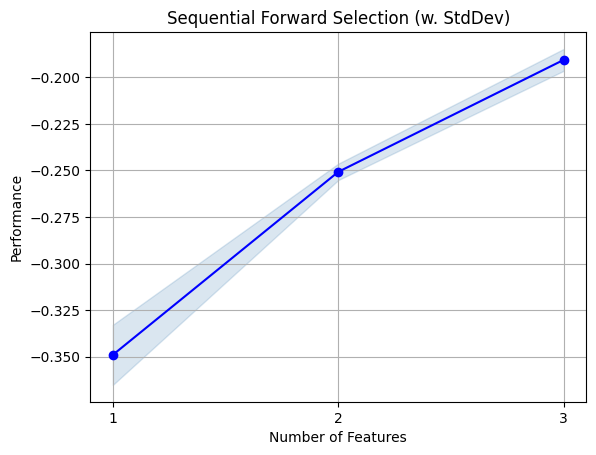

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [ ]:
class ColumnExtractor(object):
    def __init__(self, cols):
        self.cols = cols
    def transform(self, X):
        return X[:,self.cols]
    def fit(self, X, y=None):
        return self

In [ ]:
rfe_sfs_pipeline = sk.pipeline.Pipeline(steps=[
    ('preprocessor', preprocessor_sklearn), 
    ('rfe_extractor', ColumnExtractor(rfe_sfs_idx)),
    ('model', classifier)
])

rfe_sfs_pipeline.fit(X_train, Y_train)

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:397: UserWarning:

,steps,"[('preprocessor', ...), ('rfe_extractor', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
Y_predicted_rfe_sfs = rfe_sfs_pipeline.predict(X_test)
metrics = {}
metrics['precision']=sk.metrics.precision_score(Y_test,Y_predicted_rfe_sfs,average='macro')
metrics['recall']=sk.metrics.recall_score(Y_test,Y_predicted_rfe_sfs,average='macro')
metrics['f1_score']=sk.metrics.f1_score(Y_test,Y_predicted_rfe_sfs,average='macro')
Y_predicted_proba_rfe_sfs = rfe_sfs_pipeline.predict_proba(X_test)
metrics['roc_auc']=sk.metrics.roc_auc_score(Y_test,Y_predicted_proba_rfe_sfs,multi_class='ovr')
metrics

{'precision': 0.8669310051353066,
 'recall': 0.8664410099754927,
 'f1_score': 0.8661508947957546,
 'roc_auc': 0.9789820967510435}

In [ ]:
experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
RUN_NAME = 'rfe_sfs_feature_selection'

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id 
    mlflow.sklearn.log_model(rfe_sfs_pipeline, 
                             artifact_path="models",
                             signature=signature,
                             input_example=input_example,
                             pip_requirements=req_file
                             )
    mlflow.log_metrics(metrics)
    mlflow.log_artifact('rfe_sfx_cols.txt')
    mlflow.log_artifact('rfe_sfx_idx.txt')
    mlflow.log_params(rfe_sfs_pipeline.get_params())

run = mlflow.get_run(run_id) 
assert (run.info.status =='FINISHED')

2025/11/09 15:09:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run rfe_sfs_feature_selection at: http://127.0.0.1:5000/#/experiments/1/runs/4208779199a84314ae681e43d1e2912b.
2025/11/09 15:09:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1.


## RFE

### Autofeat features

In [45]:
from sklearn.feature_selection import RFE
X_train_acl

,num__battery_power,num__clock_speed,num__fc,num__int_memory,num__m_dep,num__mobile_wt,num__n_cores,num__pc,num__px_height,num__px_width,...,afcl__px_height*ram,afcl__sqrt(n_cores)*ram,afcl__battery_power*ram,afcl__ram*log(int_memory),afcl__battery_power*px_width,afcl__battery_power*px_height,afcl__ram*log(talk_time),afcl__sqrt(clock_speed)*ram,afcl__mobile_wt*talk_time,afcl__mobile_wt*log(int_memory)
0,-1.283223,1.328350,-0.296234,-1.341515,1.038172,1.253435,-1.523014,-0.451524,0.817263,1.583863,...,0.946929,-0.692773,-0.544491,-0.405533,-0.318951,-0.190338,0.172347,1.043352,-0.083463,-0.425352
1,-0.886964,-1.246510,-0.753320,1.312250,-1.401807,0.183597,0.199532,1.191697,-1.129467,-1.053514,...,-0.811032,0.344837,-0.377951,0.633232,-1.098779,-1.027834,0.788944,-0.561524,1.554824,0.843010
2,-1.220181,-0.387824,-0.753320,0.482949,-0.356102,0.802977,1.491442,-0.287202,0.314450,-0.108473,...,0.345734,0.812471,-0.602569,0.396640,-0.889852,-0.383087,0.596675,-0.001508,1.479643,1.062747
3,-1.080590,-0.756089,-0.067692,1.754544,-0.007108,0.465133,1.060806,-0.780168,-1.187313,-1.009826,...,-0.761061,1.820086,-0.015455,1.843419,-1.166758,-1.075362,1.102043,0.500145,0.017527,1.218059
4,-0.315090,-0.142314,-0.981863,1.533397,1.038172,1.140821,-1.523014,1.191697,-0.539886,-1.699638,...,-0.906538,-1.466773,-1.198278,-1.196553,-1.230018,-0.539010,-1.229252,-1.259659,0.693040,1.757994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,0.763364,0.837330,0.846480,-1.507375,0.690880,-0.041632,-0.661741,1.191697,-0.866937,-1.078808,...,-0.277330,0.930336,2.044753,-0.149635,-0.387889,-0.595459,0.993925,2.179445,-0.652376,-1.411619
1360,1.269945,-1.246510,0.389394,1.091103,1.387166,-0.576551,0.630169,0.041442,-1.218460,1.034314,...,-1.048189,-1.419632,-1.252605,-1.461972,1.901497,-0.934823,-1.474297,-1.538057,-0.532309,0.122676
1361,-0.646056,-1.246510,0.389394,1.256963,-1.401807,-0.463936,1.491442,-0.451524,-1.249608,0.972231,...,-0.980303,-0.246891,-0.803284,-0.412329,0.053695,-1.082251,-1.038149,-1.047212,-1.187625,0.262115
1362,1.204652,0.101998,2.903366,0.704096,-0.007108,0.521441,-1.092377,1.356019,0.421242,0.337605,...,-0.315055,-1.040598,-0.344764,-0.628516,1.168891,1.017485,-0.533354,-0.698053,1.288883,0.925917


In [46]:
rfe_selector = RFE(estimator=classifier, n_features_to_select=12, step = 0.2)
X_train_rfe = rfe_selector.fit_transform(X_train_acl,Y_train)

In [47]:
X_train_acl_rfe = pd.DataFrame(X_train_rfe, columns=rfe_selector.get_feature_names_out())
X_train_acl_rfe

,num__ram,afcl__ram,afcl__ram*sc_h,afcl__px_width*ram,afcl__px_height*ram,afcl__sqrt(n_cores)*ram,afcl__battery_power*ram,afcl__ram*log(int_memory),afcl__battery_power*px_width,afcl__battery_power*px_height,afcl__ram*log(talk_time),afcl__sqrt(clock_speed)*ram
0,0.375556,0.375556,0.079257,1.331543,0.946929,-0.692773,-0.544491,-0.405533,-0.318951,-0.190338,0.172347,1.043352
1,0.202965,0.202965,-0.183670,-0.462731,-0.811032,0.344837,-0.377951,0.633232,-1.098779,-1.027834,0.788944,-0.561524
2,0.148511,0.148511,-0.901070,0.061392,0.345734,0.812471,-0.602569,0.396640,-0.889852,-0.383087,0.596675,-0.001508
3,1.210823,1.210823,-0.351780,0.089710,-0.761061,1.820086,-0.015455,1.843419,-1.166758,-1.075362,1.102043,0.500145
4,-1.487875,-1.487875,-1.126752,-1.409309,-0.906538,-1.466773,-1.198278,-1.196553,-1.230018,-0.539010,-1.229252,-1.259659
...,...,...,...,...,...,...,...,...,...,...,...,...
1359,1.645531,1.645531,-0.416227,0.247782,-0.277330,0.930336,2.044753,-0.149635,-0.387889,-0.595459,0.993925,2.179445
1360,-1.719535,-1.719535,-1.367260,-1.305454,-1.048189,-1.419632,-1.252605,-1.461972,1.901497,-0.934823,-1.474297,-1.538057
1361,-0.753209,-0.753209,-1.115094,-0.273899,-0.980303,-0.246891,-0.803284,-0.412329,0.053695,-1.082251,-1.038149,-1.047212
1362,-0.899958,-0.899958,-1.172127,-0.617296,-0.315055,-1.040598,-0.344764,-0.628516,1.168891,1.017485,-0.533354,-0.698053


In [48]:
rfe_selector.get_feature_names_out()

array(['num__ram', 'afcl__ram', 'afcl__ram*sc_h', 'afcl__px_width*ram',
       'afcl__px_height*ram', 'afcl__sqrt(n_cores)*ram',
       'afcl__battery_power*ram', 'afcl__ram*log(int_memory)',
       'afcl__battery_power*px_width', 'afcl__battery_power*px_height',
       'afcl__ram*log(talk_time)', 'afcl__sqrt(clock_speed)*ram'],
      dtype=object)

In [ ]:
rfe_pipeline = sk.pipeline.Pipeline(steps=[
    ('preprocessor', preprocessor_acl), 
    ('rfe_extractor', RFE(estimator=classifier, n_features_to_select=12, step = 0.2)),
    ('model', classifier)
])

rfe_pipeline.fit(X_train, Y_train)

2025-11-09 13:08:55,687 WARNING: [AutoFeat] This just calls fit_transform() but does not return the transformed dataframe.
2025-11-09 13:08:55,689 INFO: [AutoFeat] It is much more efficient to call fit_transform() instead of fit() and transform()!
2025-11-09 13:08:55,692 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 406 features.
2025-11-09 13:08:55,693 INFO: [AutoFeat] With 1364 data points this new feature matrix would use about 0.00 gb of space.
2025-11-09 13:08:55,694 INFO: [feateng] Step 1: transformation of original features


2025-11-09 13:08:56,114 INFO: [feateng] Generated 26 transformed features from 14 original features - done.
2025-11-09 13:08:56,118 INFO: [feateng] Step 2: first combination of features


2025-11-09 13:08:56,571 INFO: [feateng] Generated 780 feature combinations from 780 original feature tuples - done.
2025-11-09 13:08:56,578 INFO: [feateng] Generated altogether 808 new features in 2 steps
2025-11-09 13:08:56,579 INFO: [feateng] Removing correlated features, as well as additions at the highest level
2025-11-09 13:08:56,605 INFO: [feateng] Generated a total of 561 additional features


[featsel] Scaling data...done.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


2025-11-09 13:08:57,659 INFO: [featsel] Feature selection run 2/5
2025-11-09 13:08:57,663 INFO: [featsel] Feature selection run 4/5
2025-11-09 13:08:57,708 INFO: [featsel] Feature selection run 5/5
2025-11-09 13:08:57,825 INFO: [featsel] Feature selection run 1/5
2025-11-09 13:08:57,875 INFO: [featsel] Feature selection run 3/5


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.8min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.8min remaining:  1.2min


2025-11-09 13:10:49,564 INFO: [featsel] 33 features after 5 feature selection runs
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:
2025-11-09 13:10:49,570 INFO: [featsel] 22 features after correlation filtering


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.9min finished


2025-11-09 13:10:53,358 INFO: [featsel] 17 features after noise filtering
2025-11-09 13:10:53,359 INFO: [AutoFeat] Computing 15 new features.


2025-11-09 13:10:54,762 INFO: [AutoFeat]    15/   15 new features ...done.
2025-11-09 13:10:54,766 INFO: [AutoFeat] Final dataframe with 29 feature columns (15 new).
2025-11-09 13:10:54,769 INFO: [AutoFeat] Training final classification model.


2025-11-09 13:10:56,022 INFO: [AutoFeat] Trained model: largest coefficients:
2025-11-09 13:10:56,025 INFO: [ 5.67262016e-08  8.87478178e-09 -7.77159958e-09 -5.78293838e-08]
2025-11-09 13:10:56,029 INFO: 0.000123 * ram*log(int_memory)
2025-11-09 13:10:56,031 INFO: 0.000110 * ram*sc_h
2025-11-09 13:10:56,033 INFO: 0.000105 * sqrt(n_cores)*ram
2025-11-09 13:10:56,035 INFO: 0.000100 * battery_power*talk_time
2025-11-09 13:10:56,035 INFO: 0.000094 * sqrt(pc)*ram
2025-11-09 13:10:56,036 INFO: 0.000072 * sqrt(clock_speed)*ram
2025-11-09 13:10:56,039 INFO: 0.000066 * ram
2025-11-09 13:10:56,040 INFO: 0.000061 * ram*log(talk_time)
2025-11-09 13:10:56,111 INFO: 0.000058 * mobile_wt*talk_time
2025-11-09 13:10:56,112 INFO: 0.000038 * sqrt(m_dep)*ram
2025-11-09 13:10:56,117 INFO: 0.000025 * mobile_wt*log(int_memory)
2025-11-09 13:10:56,119 INFO: 0.000021 * px_height
2025-11-09 13:10:56,123 INFO: [AutoFeat] Final score: 0.6320
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklear

,steps,"[('preprocessor', ...), ('rfe_extractor', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
Y_predicted_rfe = rfe_pipeline.predict(X_test)
metrics = {}
metrics['precision']=sk.metrics.precision_score(Y_test,Y_predicted_rfe,average='macro')
metrics['recall']=sk.metrics.recall_score(Y_test,Y_predicted_rfe,average='macro')
metrics['f1_score']=sk.metrics.f1_score(Y_test,Y_predicted_rfe,average='macro')
Y_predicted_proba_rfe = rfe_pipeline.predict_proba(X_test)
metrics['roc_auc']=sk.metrics.roc_auc_score(Y_test,Y_predicted_proba_rfe,multi_class='ovr')
metrics

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 15:17:15,661 INFO: [AutoFeat] Computing 15 new features.
2025-11-09 15:17:15,682 INFO: [AutoFeat]    15/   15 new features ...done.
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 15:17:15,715 INFO: [AutoFeat] Computing 15 new features.
2025-11-09 15:17:15,728 INFO: [AutoFeat]    15/   15 new features ...done.


{'precision': 0.926366779975696,
 'recall': 0.9261589175382279,
 'f1_score': 0.925878966108582,
 'roc_auc': 0.9934483033296237}

In [ ]:
experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
RUN_NAME = 'rfe_feature_selection'

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id 
    mlflow.sklearn.log_model(rfe_pipeline, 
                             artifact_path="models",
                             signature=signature,
                             input_example=input_example,
                             pip_requirements=req_file
                             )
    mlflow.log_metrics(metrics)
    mlflow.log_artifact(art)
    mlflow.log_params(rfe_pipeline.get_params())

run = mlflow.get_run(run_id) 
assert (run.info.status =='FINISHED')

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 15:17:18,633 INFO: [AutoFeat] Computing 15 new features.


2025-11-09 15:17:20,989 INFO: [AutoFeat]    15/   15 new features ...done.


2025/11/09 15:17:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run rfe_feature_selection at: http://127.0.0.1:5000/#/experiments/1/runs/aa025af8bb374475adb280dd663b1ebd.
2025/11/09 15:17:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1.


### Sklearn Features

In [ ]:
rfe_skl_selector = RFE(estimator=classifier, n_features_to_select=12, step = 0.2)
X_train_skl_rfe = rfe_skl_selector.fit_transform(X_train_sklearn,Y_train)

In [ ]:
X_train_skl_rfe = pd.DataFrame(X_train_skl_rfe, columns=rfe_skl_selector.get_feature_names_out())
X_train_skl_rfe

,num__battery_power,num__px_height,num__px_width,num__ram,quantile__battery_power,quantile__px_height,quantile__px_width,quantile__ram,poly_px__px_height,poly_px__px_width,poly_px__px_height px_width,poly_px__px_width^2
0,-1.283223,0.817263,1.583863,0.375556,0.129129,0.778568,0.957700,0.618132,0.817263,1.583863,1.262681,1.829184
1,-0.886964,-1.129467,-1.053514,0.202965,0.250250,0.113113,0.193694,0.554945,-1.129467,-1.053514,-0.957268,-1.025876
2,-1.220181,0.314450,-0.108473,0.148511,0.146030,0.661679,0.461489,0.530957,0.314450,-0.108473,0.047171,-0.276936
3,-1.080590,-1.187313,-1.009826,1.210823,0.187821,0.086086,0.206150,0.844407,-1.187313,-1.009826,-0.979458,-0.998003
4,-0.315090,-0.539886,-1.699638,-1.487875,0.418418,0.376374,0.016517,0.071071,-0.539886,-1.699637,-0.840334,-1.361725
...,...,...,...,...,...,...,...,...,...,...,...,...
1359,0.763364,-0.866937,-1.078808,1.645531,0.717217,0.222222,0.185620,0.973735,-0.866937,-1.078808,-0.848233,-1.041715
1360,1.269945,-1.218460,1.034314,-1.719535,0.862057,0.072634,0.796186,0.000000,-1.218460,1.034314,-0.887247,1.037634
1361,-0.646056,-1.249608,0.972231,-0.753209,0.319319,0.060060,0.778627,0.286286,-1.249608,0.972231,-0.918487,0.954719
1362,1.204652,0.421242,0.337605,-0.899958,0.844607,0.687688,0.600307,0.240425,0.421242,0.337605,0.309756,0.182931


In [ ]:
rfe_cols = X_train_skl_rfe.columns.tolist()
rfe_cols

['num__battery_power',
 'num__px_height',
 'num__px_width',
 'num__ram',
 'quantile__battery_power',
 'quantile__px_height',
 'quantile__px_width',
 'quantile__ram',
 'poly_px__px_height',
 'poly_px__px_width',
 'poly_px__px_height px_width',
 'poly_px__px_width^2']

In [ ]:
rfe_idx = rfe_skl_selector.support_
rfe_idx

array([ True, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [ ]:
with open('rfe_skl_idx.txt', 'w+') as f:
    f.write(str(rfe_idx))
with open('rfe_skl_cols.txt', 'w+') as f:
    f.write(str(rfe_cols))

In [ ]:
rfe_skl_pipeline = sk.pipeline.Pipeline(steps=[
    ('preprocessor', preprocessor_sklearn), 
    ('rfe_extractor', ColumnExtractor(rfe_idx)),
    ('model', classifier)
])

rfe_skl_pipeline.fit(X_train, Y_train)

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:397: UserWarning:

,steps,"[('preprocessor', ...), ('rfe_extractor', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
Y_predicted_rfe_sklearn = rfe_skl_pipeline.predict(X_test)
metrics = {}
metrics['precision']=sk.metrics.precision_score(Y_test,Y_predicted_rfe_sklearn,average='macro')
metrics['recall']=sk.metrics.recall_score(Y_test,Y_predicted_rfe_sklearn,average='macro')
metrics['f1_score']=sk.metrics.f1_score(Y_test,Y_predicted_rfe_sklearn,average='macro')
Y_predicted_proba_rfe_sclearn = rfe_skl_pipeline.predict_proba(X_test)
metrics['roc_auc']=sk.metrics.roc_auc_score(Y_test,Y_predicted_proba_rfe_sclearn,multi_class='ovr')
metrics

{'precision': 0.9052431371618821,
 'recall': 0.9059391287839564,
 'f1_score': 0.9054448510324549,
 'roc_auc': 0.9894791807441226}

In [ ]:
experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
RUN_NAME = 'rfe_sklearn_feature_selection'

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id 
    mlflow.sklearn.log_model(rfe_skl_pipeline, 
                             artifact_path="models",
                             signature=signature,
                             input_example=input_example,
                             pip_requirements=req_file
                             )
    mlflow.log_metrics(metrics)
    mlflow.log_artifact('rfe_skl_cols.txt')
    mlflow.log_artifact('rfe_skl_idx.txt')
    mlflow.log_params(rfe_skl_pipeline.get_params())

run = mlflow.get_run(run_id) 
assert (run.info.status =='FINISHED')

2025/11/09 15:18:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run rfe_sklearn_feature_selection at: http://127.0.0.1:5000/#/experiments/1/runs/ea720c6659a745f4b9bcb8f5cd701afb.
2025/11/09 15:18:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1.


# Hyperparams

## Gridsearch

In [19]:
from sklearn.model_selection import  GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [50,100,200],
    'max_depth': [1,3,5,None],
    'max_features': [0.1,0.5,1,'sqrt']
}

In [ ]:
gs = GridSearchCV(classifier, param_grid, cv=2, scoring='f1_macro')
gs.fit(X_train_rfe, Y_train)
print("Лучшие гиперпараметры:", gs.best_params_)

Лучшие гиперпараметры: {'max_depth': None, 'max_features': 1, 'n_estimators': 200}


In [40]:
GSclassifier = sk.ensemble.RandomForestClassifier(n_estimators=200,max_depth=None,max_features=1)
rfe_gs_pipeline = sk.pipeline.Pipeline(steps=[
    ('preprocessor', preprocessor_acl), 
    ('rfe_extractor', RFE(estimator=classifier, n_features_to_select=12, step = 0.2)),
    ('model', GSclassifier)
])

rfe_gs_pipeline.fit(X_train, Y_train)

2025-11-09 19:02:56,778 WARNING: [AutoFeat] This just calls fit_transform() but does not return the transformed dataframe.
2025-11-09 19:02:56,780 INFO: [AutoFeat] It is much more efficient to call fit_transform() instead of fit() and transform()!
2025-11-09 19:02:56,782 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 406 features.
2025-11-09 19:02:56,784 INFO: [AutoFeat] With 1364 data points this new feature matrix would use about 0.00 gb of space.
2025-11-09 19:02:56,785 INFO: [feateng] Step 1: transformation of original features


2025-11-09 19:02:57,258 INFO: [feateng] Generated 26 transformed features from 14 original features - done.
2025-11-09 19:02:57,260 INFO: [feateng] Step 2: first combination of features


2025-11-09 19:02:57,797 INFO: [feateng] Generated 780 feature combinations from 780 original feature tuples - done.
2025-11-09 19:02:57,805 INFO: [feateng] Generated altogether 808 new features in 2 steps
2025-11-09 19:02:57,806 INFO: [feateng] Removing correlated features, as well as additions at the highest level
2025-11-09 19:02:57,832 INFO: [feateng] Generated a total of 561 additional features


[featsel] Scaling data...done.        780 feature tuples combined
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


2025-11-09 19:02:58,813 INFO: [featsel] Feature selection run 4/5
2025-11-09 19:02:58,821 INFO: [featsel] Feature selection run 1/5
2025-11-09 19:02:58,822 INFO: [featsel] Feature selection run 3/5
2025-11-09 19:02:58,830 INFO: [featsel] Feature selection run 2/5
2025-11-09 19:02:58,888 INFO: [featsel] Feature selection run 5/5


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.0min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  2.0min remaining:  1.3min


2025-11-09 19:05:00,853 INFO: [featsel] 32 features after 5 feature selection runs
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:
2025-11-09 19:05:00,865 INFO: [featsel] 21 features after correlation filtering


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.0min finished


2025-11-09 19:05:04,665 INFO: [featsel] 15 features after noise filtering
2025-11-09 19:05:04,666 INFO: [AutoFeat] Computing 13 new features.


2025-11-09 19:05:06,526 INFO: [AutoFeat]    13/   13 new features ...done.
2025-11-09 19:05:06,529 INFO: [AutoFeat] Final dataframe with 27 feature columns (13 new).
2025-11-09 19:05:06,530 INFO: [AutoFeat] Training final classification model.


2025-11-09 19:05:07,936 INFO: [AutoFeat] Trained model: largest coefficients:
2025-11-09 19:05:07,947 INFO: [ 5.81390138e-08  8.08750445e-09 -9.59688574e-09 -5.66296325e-08]
2025-11-09 19:05:07,959 INFO: 0.000118 * ram*log(int_memory)
2025-11-09 19:05:07,959 INFO: 0.000106 * ram*sc_h
2025-11-09 19:05:07,960 INFO: 0.000102 * sqrt(n_cores)*ram
2025-11-09 19:05:07,963 INFO: 0.000095 * sqrt(pc)*ram
2025-11-09 19:05:07,969 INFO: 0.000094 * ram*log(talk_time)
2025-11-09 19:05:07,980 INFO: 0.000080 * mobile_wt*talk_time
2025-11-09 19:05:07,988 INFO: 0.000071 * sqrt(clock_speed)*ram
2025-11-09 19:05:07,990 INFO: 0.000064 * ram
2025-11-09 19:05:07,999 INFO: 0.000026 * mobile_wt*log(int_memory)
2025-11-09 19:05:08,003 INFO: 0.000021 * px_height
2025-11-09 19:05:08,005 INFO: [AutoFeat] Final score: 0.6283
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be remove

,steps,"[('preprocessor', ...), ('rfe_extractor', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [41]:
Y_predicted_rfe_gs = rfe_gs_pipeline.predict(X_test)
metrics = {}
metrics['precision']=sk.metrics.precision_score(Y_test,Y_predicted_rfe_gs,average='macro')
metrics['recall']=sk.metrics.recall_score(Y_test,Y_predicted_rfe_gs,average='macro')
metrics['f1_score']=sk.metrics.f1_score(Y_test,Y_predicted_rfe_gs,average='macro')
Y_predicted_proba_rfe_gs = rfe_gs_pipeline.predict_proba(X_test)
metrics['roc_auc']=sk.metrics.roc_auc_score(Y_test,Y_predicted_proba_rfe_gs,multi_class='ovr')
metrics

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 19:05:24,207 INFO: [AutoFeat] Computing 13 new features.
2025-11-09 19:05:24,235 INFO: [AutoFeat]    13/   13 new features ...done.
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 19:05:24,267 INFO: [AutoFeat] Computing 13 new features.
2025-11-09 19:05:24,275 INFO: [AutoFeat]    13/   13 new features ...done.


{'precision': 0.9191176893357785,
 'recall': 0.9190017603810707,
 'f1_score': 0.918912153931652,
 'roc_auc': 0.9916496922325264}

In [ ]:
experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
RUN_NAME = 'gridsearch_with_rfe'

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id 
    mlflow.sklearn.log_model(rfe_gs_pipeline, 
                             artifact_path="models",
                             signature=signature,
                             input_example=input_example,
                             pip_requirements=req_file,
                             registered_model_name=REGISTRY_MODEL_NAME                       
                             )
    mlflow.log_metrics(metrics)
    mlflow.log_artifact(art)
    mlflow.log_params(rfe_gs_pipeline.get_params())

run = mlflow.get_run(run_id) 
assert (run.info.status =='FINISHED')

Registered model 'mobile_price_model_rf' already exists. Creating a new version of this model...
2025/11/09 19:05:47 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: mobile_price_model_rf, version 5
Created version '5' of model 'mobile_price_model_rf'.
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 19:05:48,135 INFO: [AutoFeat] Computing 13 new features.


2025-11-09 19:05:50,464 INFO: [AutoFeat]    13/   13 new features ...done.


2025/11/09 19:05:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run gridsearch_with_rfe at: http://127.0.0.1:5000/#/experiments/1/runs/5cc3096253db46aba93afc31a67f4eb2.
2025/11/09 19:05:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1.


## Optuna

In [20]:
import optuna

In [2]:
def objective(trial):    
    depth = trial.suggest_int('depth', 1,10)
    n_estimators = trial.suggest_int('n_estimators', 50,200,step=50)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.1)
    
    opt_pipeline = sk.pipeline.Pipeline(steps=[
    ('preprocessor', preprocessor_acl), 
    ('rfe_extractor', RFE(estimator=classifier, n_features_to_select=12, step = 0.2)),
    ('model', catboost.CatBoostClassifier(depth=depth, learning_rate=learning_rate,n_estimators=n_estimators, verbose=0))
])

    opt_pipeline.fit(X_train, Y_train)

    # предсказываем и вычисляем RMSE
    Y_predicted_opt = opt_pipeline.predict(X_test)
    f1=sk.metrics.f1_score(Y_test,Y_predicted_opt,average='macro')

    return f1

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2025-11-09 15:39:55,601] A new study created in memory with name: no-name-33c9e263-a569-49ee-80a7-aaaa84fc4d76
2025-11-09 15:39:55,689 WARNING: [AutoFeat] This just calls fit_transform() but does not return the transformed dataframe.
2025-11-09 15:39:55,690 INFO: [AutoFeat] It is much more efficient to call fit_transform() instead of fit() and transform()!
2025-11-09 15:39:55,693 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 406 features.
2025-11-09 15:39:55,696 INFO: [AutoFeat] With 1364 data points this new feature matrix would use about 0.00 gb of space.
2025-11-09 15:39:55,697 INFO: [feateng] Step 1: transformation of original features


2025-11-09 15:39:56,770 INFO: [feateng] Generated 26 transformed features from 14 original features - done.
2025-11-09 15:39:56,774 INFO: [feateng] Step 2: first combination of features


2025-11-09 15:39:57,403 INFO: [feateng] Generated 780 feature combinations from 780 original feature tuples - done.
2025-11-09 15:39:57,411 INFO: [feateng] Generated altogether 808 new features in 2 steps
2025-11-09 15:39:57,413 INFO: [feateng] Removing correlated features, as well as additions at the highest level
2025-11-09 15:39:57,440 INFO: [feateng] Generated a total of 561 additional features


[featsel] Scaling data...done.        780 feature tuples combined
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


2025-11-09 15:40:01,493 INFO: [featsel] Feature selection run 2/5
2025-11-09 15:40:01,493 INFO: [featsel] Feature selection run 1/5
2025-11-09 15:40:01,493 INFO: [featsel] Feature selection run 5/5
2025-11-09 15:40:01,493 INFO: [featsel] Feature selection run 3/5
2025-11-09 15:40:01,495 INFO: [featsel] Feature selection run 4/5


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.9min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.9min remaining:  1.3min


2025-11-09 15:41:55,769 INFO: [featsel] 32 features after 5 feature selection runs
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:
2025-11-09 15:41:55,791 INFO: [featsel] 20 features after correlation filtering


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.0min finished


2025-11-09 15:41:59,385 INFO: [featsel] 14 features after noise filtering
2025-11-09 15:41:59,386 INFO: [AutoFeat] Computing 12 new features.


2025-11-09 15:42:01,652 INFO: [AutoFeat]    12/   12 new features ...done.
2025-11-09 15:42:01,663 INFO: [AutoFeat] Final dataframe with 26 feature columns (12 new).
2025-11-09 15:42:01,664 INFO: [AutoFeat] Training final classification model.


2025-11-09 15:42:02,650 INFO: [AutoFeat] Trained model: largest coefficients:
2025-11-09 15:42:02,659 INFO: [ 7.35695199e-08  1.19074625e-08 -1.11389080e-08 -7.43380744e-08]
2025-11-09 15:42:02,661 INFO: 0.000145 * ram*log(int_memory)
2025-11-09 15:42:02,662 INFO: 0.000129 * sqrt(n_cores)*ram
2025-11-09 15:42:02,663 INFO: 0.000118 * ram*log(talk_time)
2025-11-09 15:42:02,665 INFO: 0.000104 * ram*sc_h
2025-11-09 15:42:02,665 INFO: 0.000102 * mobile_wt*talk_time
2025-11-09 15:42:02,666 INFO: 0.000091 * sqrt(clock_speed)*ram
2025-11-09 15:42:02,666 INFO: 0.000085 * ram
2025-11-09 15:42:02,666 INFO: 0.000033 * mobile_wt*log(int_memory)
2025-11-09 15:42:02,666 INFO: 0.000027 * px_height
2025-11-09 15:42:02,668 INFO: [AutoFeat] Final score: 0.6254
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 15:42:02,680 INF

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 15:42:05,068 INFO: [AutoFeat] Computing 12 new features.
2025-11-09 15:42:05,085 INFO: [AutoFeat]    12/   12 new features ...done.
[I 2025-11-09 15:42:05,096] Trial 0 finished with value: 0.841695788768531 and parameters: {'depth': 1, 'n_estimators': 200, 'learning_rate': 0.02984296594155947}. Best is trial 0 with value: 0.841695788768531.
2025-11-09 15:42:05,127 WARNING: [AutoFeat] This just calls fit_transform() but does not return the transformed dataframe.
2025-11-09 15:42:05,128 INFO: [AutoFeat] It is much more efficient to call fit_transform() instead of fit() and transform()!
2025-11-09 15:42:05,131 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 406 features.
2025-11-09 15:42:05,132 INFO: [AutoFeat] With 1364 data points

2025-11-09 15:42:08,311 INFO: [feateng] Generated 26 transformed features from 14 original features - done.
2025-11-09 15:42:08,314 INFO: [feateng] Step 2: first combination of features


2025-11-09 15:42:08,887 INFO: [feateng] Generated 780 feature combinations from 780 original feature tuples - done.
2025-11-09 15:42:08,898 INFO: [feateng] Generated altogether 808 new features in 2 steps
2025-11-09 15:42:08,900 INFO: [feateng] Removing correlated features, as well as additions at the highest level
2025-11-09 15:42:08,946 INFO: [feateng] Generated a total of 561 additional features


[featsel] Scaling data...done.        780 feature tuples combined
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


2025-11-09 15:42:08,989 INFO: [featsel] Feature selection run 2/5
2025-11-09 15:42:08,989 INFO: [featsel] Feature selection run 3/5
2025-11-09 15:42:08,990 INFO: [featsel] Feature selection run 4/5
2025-11-09 15:42:09,002 INFO: [featsel] Feature selection run 5/5
2025-11-09 15:42:12,757 INFO: [featsel] Feature selection run 1/5


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.8min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.8min remaining:  1.2min


2025-11-09 15:43:57,573 INFO: [featsel] 33 features after 5 feature selection runs
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:
2025-11-09 15:43:57,600 INFO: [featsel] 21 features after correlation filtering


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished


2025-11-09 15:44:00,814 INFO: [featsel] 16 features after noise filtering
2025-11-09 15:44:00,816 INFO: [AutoFeat] Computing 14 new features.


2025-11-09 15:44:03,795 INFO: [AutoFeat]    14/   14 new features ...done.
2025-11-09 15:44:03,809 INFO: [AutoFeat] Final dataframe with 28 feature columns (14 new).
2025-11-09 15:44:03,810 INFO: [AutoFeat] Training final classification model.


2025-11-09 15:44:04,737 INFO: [AutoFeat] Trained model: largest coefficients:
2025-11-09 15:44:04,739 INFO: [ 5.97756266e-08  8.55932393e-09 -9.85137111e-09 -5.84835795e-08]
2025-11-09 15:44:04,765 INFO: 0.000122 * ram*log(int_memory)
2025-11-09 15:44:04,767 INFO: 0.000106 * ram*sc_h
2025-11-09 15:44:04,769 INFO: 0.000105 * sqrt(n_cores)*ram
2025-11-09 15:44:04,785 INFO: 0.000097 * sqrt(pc)*ram
2025-11-09 15:44:04,786 INFO: 0.000097 * ram*log(talk_time)
2025-11-09 15:44:04,786 INFO: 0.000083 * mobile_wt*talk_time
2025-11-09 15:44:04,787 INFO: 0.000073 * sqrt(clock_speed)*ram
2025-11-09 15:44:04,791 INFO: 0.000066 * ram
2025-11-09 15:44:04,794 INFO: 0.000038 * sqrt(m_dep)*ram
2025-11-09 15:44:04,794 INFO: 0.000026 * mobile_wt*log(int_memory)
2025-11-09 15:44:04,798 INFO: 0.000021 * px_height
2025-11-09 15:44:04,807 INFO: [AutoFeat] Final score: 0.6349
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 15:44:07,409 INFO: [AutoFeat] Computing 14 new features.
2025-11-09 15:44:07,431 INFO: [AutoFeat]    14/   14 new features ...done.
[I 2025-11-09 15:44:07,448] Trial 1 finished with value: 0.9323629093212977 and parameters: {'depth': 7, 'n_estimators': 100, 'learning_rate': 0.06950777953668513}. Best is trial 1 with value: 0.9323629093212977.
2025-11-09 15:44:07,488 WARNING: [AutoFeat] This just calls fit_transform() but does not return the transformed dataframe.
2025-11-09 15:44:07,489 INFO: [AutoFeat] It is much more efficient to call fit_transform() instead of fit() and transform()!
2025-11-09 15:44:07,493 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 406 features.
2025-11-09 15:44:07,494 INFO: [AutoFeat] With 1364 data poin

2025-11-09 15:44:08,065 INFO: [feateng] Generated 26 transformed features from 14 original features - done.
2025-11-09 15:44:08,069 INFO: [feateng] Step 2: first combination of features


2025-11-09 15:44:08,745 INFO: [feateng] Generated 780 feature combinations from 780 original feature tuples - done.
2025-11-09 15:44:08,756 INFO: [feateng] Generated altogether 808 new features in 2 steps
2025-11-09 15:44:08,758 INFO: [feateng] Removing correlated features, as well as additions at the highest level
2025-11-09 15:44:08,790 INFO: [feateng] Generated a total of 561 additional features


[featsel] Scaling data...done.        780 feature tuples combined
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


2025-11-09 15:44:08,819 INFO: [featsel] Feature selection run 1/5
2025-11-09 15:44:08,822 INFO: [featsel] Feature selection run 2/5
2025-11-09 15:44:08,826 INFO: [featsel] Feature selection run 3/5
2025-11-09 15:44:08,846 INFO: [featsel] Feature selection run 4/5
2025-11-09 15:44:08,846 INFO: [featsel] Feature selection run 5/5


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.7min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.7min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min finished


2025-11-09 15:45:51,756 INFO: [featsel] 30 features after 5 feature selection runs
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:
2025-11-09 15:45:51,786 INFO: [featsel] 20 features after correlation filtering
2025-11-09 15:45:55,425 INFO: [featsel] 15 features after noise filtering
2025-11-09 15:45:55,427 INFO: [AutoFeat] Computing 13 new features.


2025-11-09 15:45:58,027 INFO: [AutoFeat]    13/   13 new features ...done.
2025-11-09 15:45:58,034 INFO: [AutoFeat] Final dataframe with 27 feature columns (13 new).
2025-11-09 15:45:58,035 INFO: [AutoFeat] Training final classification model.
2025-11-09 15:45:59,151 INFO: [AutoFeat] Trained model: largest coefficients:
2025-11-09 15:45:59,158 INFO: [ 4.64707074e-08  8.05942534e-09 -6.28330868e-09 -4.82468241e-08]
2025-11-09 15:45:59,162 INFO: 0.000111 * ram*log(int_memory)
2025-11-09 15:45:59,163 INFO: 0.000110 * ram*sc_h
2025-11-09 15:45:59,164 INFO: 0.000093 * sqrt(n_cores)*ram
2025-11-09 15:45:59,165 INFO: 0.000087 * ram*log(talk_time)
2025-11-09 15:45:59,166 INFO: 0.000066 * mobile_wt*talk_time
2025-11-09 15:45:59,167 INFO: 0.000062 * sqrt(clock_speed)*ram
2025-11-09 15:45:59,176 INFO: 0.000056 * ram
2025-11-09 15:45:59,177 INFO: 0.000048 * ram*log(m_dep)
2025-11-09 15:45:59,179 INFO: 0.000021 * mobile_wt*log(int_memory)
2025-11-09 15:45:59,179 INFO: 0.000017 * px_height
2025-11-0

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 15:46:08,449 INFO: [AutoFeat] Computing 13 new features.
2025-11-09 15:46:08,484 INFO: [AutoFeat]    13/   13 new features ...done.
[I 2025-11-09 15:46:08,520] Trial 2 finished with value: 0.923658469029808 and parameters: {'depth': 10, 'n_estimators': 100, 'learning_rate': 0.04800955575732459}. Best is trial 1 with value: 0.9323629093212977.
2025-11-09 15:46:08,554 WARNING: [AutoFeat] This just calls fit_transform() but does not return the transformed dataframe.
2025-11-09 15:46:08,556 INFO: [AutoFeat] It is much more efficient to call fit_transform() instead of fit() and transform()!
2025-11-09 15:46:08,559 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 406 features.
2025-11-09 15:46:08,561 INFO: [AutoFeat] With 1364 data poin

2025-11-09 15:46:16,725 INFO: [feateng] Generated 26 transformed features from 14 original features - done.
2025-11-09 15:46:16,779 INFO: [feateng] Step 2: first combination of features


2025-11-09 15:46:23,467 INFO: [feateng] Generated 780 feature combinations from 780 original feature tuples - done.
2025-11-09 15:46:23,496 INFO: [feateng] Generated altogether 808 new features in 2 steps
2025-11-09 15:46:23,497 INFO: [feateng] Removing correlated features, as well as additions at the highest level
2025-11-09 15:46:23,530 INFO: [feateng] Generated a total of 561 additional features


[featsel] Scaling data...done.        780 feature tuples combined
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


2025-11-09 15:46:23,606 INFO: [featsel] Feature selection run 2/5
2025-11-09 15:46:23,606 INFO: [featsel] Feature selection run 3/5
2025-11-09 15:46:23,606 INFO: [featsel] Feature selection run 1/5
2025-11-09 15:46:23,617 INFO: [featsel] Feature selection run 5/5
2025-11-09 15:46:23,618 INFO: [featsel] Feature selection run 4/5


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.9min remaining:  4.3min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  2.9min remaining:  1.9min


2025-11-09 15:49:18,650 INFO: [featsel] 31 features after 5 feature selection runs
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:
2025-11-09 15:49:18,701 INFO: [featsel] 20 features after correlation filtering


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.9min finished


2025-11-09 15:49:23,984 INFO: [featsel] 17 features after noise filtering
2025-11-09 15:49:24,041 INFO: [AutoFeat] Computing 15 new features.


2025-11-09 15:49:59,654 INFO: [AutoFeat]    15/   15 new features ...done.
2025-11-09 15:49:59,727 INFO: [AutoFeat] Final dataframe with 29 feature columns (15 new).
2025-11-09 15:49:59,730 INFO: [AutoFeat] Training final classification model.
2025-11-09 15:50:01,594 INFO: [AutoFeat] Trained model: largest coefficients:
2025-11-09 15:50:01,621 INFO: [ 5.80369866e-08  8.50067153e-09 -9.78789712e-09 -5.67497610e-08]
2025-11-09 15:50:01,627 INFO: 0.000119 * ram*log(int_memory)
2025-11-09 15:50:01,627 INFO: 0.000108 * ram*sc_h
2025-11-09 15:50:01,628 INFO: 0.000103 * sqrt(n_cores)*ram
2025-11-09 15:50:01,631 INFO: 0.000095 * sqrt(pc)*ram
2025-11-09 15:50:01,632 INFO: 0.000094 * ram*log(talk_time)
2025-11-09 15:50:01,632 INFO: 0.000080 * mobile_wt*talk_time
2025-11-09 15:50:01,633 INFO: 0.000070 * sqrt(clock_speed)*ram
2025-11-09 15:50:01,634 INFO: 0.000064 * ram
2025-11-09 15:50:01,635 INFO: 0.000056 * ram*log(m_dep)
2025-11-09 15:50:01,682 INFO: 0.000042 * sqrt(m_dep)*ram
2025-11-09 15:50

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 15:50:06,733 INFO: [AutoFeat] Computing 15 new features.
2025-11-09 15:50:06,769 INFO: [AutoFeat]    15/   15 new features ...done.
[I 2025-11-09 15:50:06,797] Trial 3 finished with value: 0.9234941632943121 and parameters: {'depth': 10, 'n_estimators': 50, 'learning_rate': 0.05715953830960797}. Best is trial 1 with value: 0.9323629093212977.
2025-11-09 15:50:06,828 WARNING: [AutoFeat] This just calls fit_transform() but does not return the transformed dataframe.
2025-11-09 15:50:06,830 INFO: [AutoFeat] It is much more efficient to call fit_transform() instead of fit() and transform()!
2025-11-09 15:50:06,833 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 406 features.
2025-11-09 15:50:06,835 INFO: [AutoFeat] With 1364 data poin

2025-11-09 15:50:13,978 INFO: [feateng] Generated 26 transformed features from 14 original features - done.
2025-11-09 15:50:14,035 INFO: [feateng] Step 2: first combination of features


2025-11-09 15:50:20,863 INFO: [feateng] Generated 780 feature combinations from 780 original feature tuples - done.
2025-11-09 15:50:20,897 INFO: [feateng] Generated altogether 808 new features in 2 steps
2025-11-09 15:50:20,898 INFO: [feateng] Removing correlated features, as well as additions at the highest level
2025-11-09 15:50:20,932 INFO: [feateng] Generated a total of 561 additional features


[featsel] Scaling data...done.        780 feature tuples combined
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


2025-11-09 15:50:20,970 INFO: [featsel] Feature selection run 4/5
2025-11-09 15:50:20,970 INFO: [featsel] Feature selection run 2/5
2025-11-09 15:50:20,970 INFO: [featsel] Feature selection run 1/5
2025-11-09 15:50:20,971 INFO: [featsel] Feature selection run 3/5
2025-11-09 15:50:20,971 INFO: [featsel] Feature selection run 5/5


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.0min remaining:  4.5min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  3.1min remaining:  2.0min


2025-11-09 15:53:25,848 INFO: [featsel] 31 features after 5 feature selection runs
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:
2025-11-09 15:53:25,917 INFO: [featsel] 21 features after correlation filtering


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.1min finished


2025-11-09 15:53:30,696 INFO: [featsel] 13 features after noise filtering
2025-11-09 15:53:30,739 INFO: [AutoFeat] Computing 11 new features.


2025-11-09 15:53:59,522 INFO: [AutoFeat]    11/   11 new features ...done.
2025-11-09 15:53:59,576 INFO: [AutoFeat] Final dataframe with 25 feature columns (11 new).
2025-11-09 15:53:59,578 INFO: [AutoFeat] Training final classification model.
2025-11-09 15:54:00,559 INFO: [AutoFeat] Trained model: largest coefficients:
2025-11-09 15:54:00,561 INFO: [ 3.43070913e-08  5.59733779e-09 -4.70650775e-09 -3.51979214e-08]
2025-11-09 15:54:00,564 INFO: 0.000109 * ram*sc_h
2025-11-09 15:54:00,572 INFO: 0.000089 * ram*log(int_memory)
2025-11-09 15:54:00,573 INFO: 0.000078 * sqrt(pc)*ram
2025-11-09 15:54:00,575 INFO: 0.000072 * sqrt(n_cores)*ram
2025-11-09 15:54:00,580 INFO: 0.000071 * ram*log(talk_time)
2025-11-09 15:54:00,581 INFO: 0.000041 * ram
2025-11-09 15:54:00,581 INFO: 0.000015 * mobile_wt*log(int_memory)
2025-11-09 15:54:00,582 INFO: 0.000013 * px_height
2025-11-09 15:54:00,653 INFO: [AutoFeat] Final score: 0.6056
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 15:54:03,132 INFO: [AutoFeat] Computing 11 new features.
2025-11-09 15:54:03,326 INFO: [AutoFeat]    11/   11 new features ...done.
[I 2025-11-09 15:54:03,364] Trial 4 finished with value: 0.9342498520920673 and parameters: {'depth': 3, 'n_estimators': 100, 'learning_rate': 0.08092334774240545}. Best is trial 4 with value: 0.9342498520920673.


2025-11-09 15:54:03,427 WARNING: [AutoFeat] This just calls fit_transform() but does not return the transformed dataframe.
2025-11-09 15:54:03,428 INFO: [AutoFeat] It is much more efficient to call fit_transform() instead of fit() and transform()!
2025-11-09 15:54:03,430 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 406 features.
2025-11-09 15:54:03,431 INFO: [AutoFeat] With 1364 data points this new feature matrix would use about 0.00 gb of space.
2025-11-09 15:54:03,432 INFO: [feateng] Step 1: transformation of original features


2025-11-09 15:54:04,999 INFO: [feateng] Generated 26 transformed features from 14 original features - done.
2025-11-09 15:54:05,002 INFO: [feateng] Step 2: first combination of features


2025-11-09 15:54:05,573 INFO: [feateng] Generated 780 feature combinations from 780 original feature tuples - done.
2025-11-09 15:54:05,581 INFO: [feateng] Generated altogether 808 new features in 2 steps
2025-11-09 15:54:05,582 INFO: [feateng] Removing correlated features, as well as additions at the highest level
2025-11-09 15:54:05,613 INFO: [feateng] Generated a total of 561 additional features


[featsel] Scaling data...done.        780 feature tuples combined
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


2025-11-09 15:54:05,637 INFO: [featsel] Feature selection run 4/5
2025-11-09 15:54:05,638 INFO: [featsel] Feature selection run 3/5
2025-11-09 15:54:05,639 INFO: [featsel] Feature selection run 5/5
2025-11-09 15:54:05,639 INFO: [featsel] Feature selection run 2/5
2025-11-09 15:54:05,640 INFO: [featsel] Feature selection run 1/5


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.7min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.8min remaining:  1.2min


2025-11-09 15:55:55,840 INFO: [featsel] 30 features after 5 feature selection runs
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:
2025-11-09 15:55:55,854 INFO: [featsel] 20 features after correlation filtering


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished


2025-11-09 15:55:59,225 INFO: [featsel] 16 features after noise filtering
2025-11-09 15:55:59,226 INFO: [AutoFeat] Computing 14 new features.


2025-11-09 15:56:01,548 INFO: [AutoFeat]    14/   14 new features ...done.
2025-11-09 15:56:01,564 INFO: [AutoFeat] Final dataframe with 28 feature columns (14 new).
2025-11-09 15:56:01,565 INFO: [AutoFeat] Training final classification model.


2025-11-09 15:56:02,828 INFO: [AutoFeat] Trained model: largest coefficients:
2025-11-09 15:56:02,829 INFO: [ 9.67982676e-08  1.40204188e-08 -1.63629003e-08 -9.44557861e-08]
2025-11-09 15:56:02,831 INFO: 0.000160 * ram*log(int_memory)
2025-11-09 15:56:02,840 INFO: 0.000150 * sqrt(n_cores)*ram
2025-11-09 15:56:02,842 INFO: 0.000133 * mobile_wt*talk_time
2025-11-09 15:56:02,843 INFO: 0.000133 * ram*log(talk_time)
2025-11-09 15:56:02,843 INFO: 0.000109 * sqrt(clock_speed)*ram
2025-11-09 15:56:02,843 INFO: 0.000105 * ram
2025-11-09 15:56:02,845 INFO: 0.000088 * ram*sc_h
2025-11-09 15:56:02,849 INFO: 0.000082 * ram*log(m_dep)
2025-11-09 15:56:02,853 INFO: 0.000073 * sqrt(m_dep)*ram
2025-11-09 15:56:02,854 INFO: 0.000043 * mobile_wt*log(int_memory)
2025-11-09 15:56:02,861 INFO: 0.000035 * px_height
2025-11-09 15:56:02,863 INFO: [AutoFeat] Final score: 0.6437
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' w

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 15:56:04,972 INFO: [AutoFeat] Computing 14 new features.
2025-11-09 15:56:04,986 INFO: [AutoFeat]    14/   14 new features ...done.
[I 2025-11-09 15:56:04,996] Trial 5 finished with value: 0.914386385418718 and parameters: {'depth': 2, 'n_estimators': 100, 'learning_rate': 0.09988690438046363}. Best is trial 4 with value: 0.9342498520920673.
2025-11-09 15:56:05,024 WARNING: [AutoFeat] This just calls fit_transform() but does not return the transformed dataframe.
2025-11-09 15:56:05,025 INFO: [AutoFeat] It is much more efficient to call fit_transform() instead of fit() and transform()!
2025-11-09 15:56:05,027 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 406 features.
2025-11-09 15:56:05,028 INFO: [AutoFeat] With 1364 data point

2025-11-09 15:56:05,471 INFO: [feateng] Generated 26 transformed features from 14 original features - done.
2025-11-09 15:56:05,474 INFO: [feateng] Step 2: first combination of features


2025-11-09 15:56:05,991 INFO: [feateng] Generated 780 feature combinations from 780 original feature tuples - done.
2025-11-09 15:56:05,998 INFO: [feateng] Generated altogether 808 new features in 2 steps
2025-11-09 15:56:06,001 INFO: [feateng] Removing correlated features, as well as additions at the highest level
2025-11-09 15:56:06,025 INFO: [feateng] Generated a total of 561 additional features
2025-11-09 15:56:06,052 INFO: [featsel] Feature selection run 1/5
2025-11-09 15:56:06,053 INFO: [featsel] Feature selection run 3/5
2025-11-09 15:56:06,055 INFO: [featsel] Feature selection run 2/5
2025-11-09 15:56:06,057 INFO: [featsel] Feature selection run 4/5
2025-11-09 15:56:06,063 INFO: [featsel] Feature selection run 5/5


[featsel] Scaling data...done.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.8min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.8min remaining:  1.2min


2025-11-09 15:57:58,889 INFO: [featsel] 31 features after 5 feature selection runs
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:
2025-11-09 15:57:58,906 INFO: [featsel] 20 features after correlation filtering


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.9min finished


2025-11-09 15:58:02,515 INFO: [featsel] 16 features after noise filtering
2025-11-09 15:58:02,517 INFO: [AutoFeat] Computing 14 new features.


2025-11-09 15:58:08,002 INFO: [AutoFeat]    14/   14 new features ...done.


2025-11-09 15:58:08,038 INFO: [AutoFeat] Final dataframe with 28 feature columns (14 new).
2025-11-09 15:58:08,040 INFO: [AutoFeat] Training final classification model.
2025-11-09 15:58:11,149 INFO: [AutoFeat] Trained model: largest coefficients:
2025-11-09 15:58:11,188 INFO: [ 6.04319987e-08  9.04730173e-09 -1.00058878e-08 -5.94734126e-08]
2025-11-09 15:58:11,192 INFO: 0.000124 * ram*log(int_memory)
2025-11-09 15:58:11,193 INFO: 0.000108 * sqrt(n_cores)*ram
2025-11-09 15:58:11,194 INFO: 0.000107 * ram*sc_h
2025-11-09 15:58:11,196 INFO: 0.000098 * sqrt(pc)*ram
2025-11-09 15:58:11,198 INFO: 0.000098 * ram*log(talk_time)
2025-11-09 15:58:11,200 INFO: 0.000083 * mobile_wt*talk_time
2025-11-09 15:58:11,228 INFO: 0.000074 * sqrt(clock_speed)*ram
2025-11-09 15:58:11,231 INFO: 0.000067 * ram
2025-11-09 15:58:11,234 INFO: 0.000039 * sqrt(m_dep)*ram
2025-11-09 15:58:11,240 INFO: 0.000027 * mobile_wt*log(int_memory)
2025-11-09 15:58:11,241 INFO: 0.000022 * px_height
2025-11-09 15:58:11,247 INFO:

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 15:58:14,396 INFO: [AutoFeat] Computing 14 new features.
2025-11-09 15:58:14,423 INFO: [AutoFeat]    14/   14 new features ...done.
[I 2025-11-09 15:58:14,434] Trial 6 finished with value: 0.9216241922307378 and parameters: {'depth': 6, 'n_estimators': 100, 'learning_rate': 0.06225064866165522}. Best is trial 4 with value: 0.9342498520920673.
2025-11-09 15:58:14,468 WARNING: [AutoFeat] This just calls fit_transform() but does not return the transformed dataframe.
2025-11-09 15:58:14,469 INFO: [AutoFeat] It is much more efficient to call fit_transform() instead of fit() and transform()!
2025-11-09 15:58:14,473 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 406 features.
2025-11-09 15:58:14,474 INFO: [AutoFeat] With 1364 data poin

2025-11-09 15:58:15,869 INFO: [feateng] Generated 26 transformed features from 14 original features - done.
2025-11-09 15:58:15,935 INFO: [feateng] Step 2: first combination of features


2025-11-09 15:58:16,713 INFO: [feateng] Generated 780 feature combinations from 780 original feature tuples - done.
2025-11-09 15:58:16,722 INFO: [feateng] Generated altogether 808 new features in 2 steps
2025-11-09 15:58:16,726 INFO: [feateng] Removing correlated features, as well as additions at the highest level
2025-11-09 15:58:16,780 INFO: [feateng] Generated a total of 561 additional features


[featsel] Scaling data...done.        780 feature tuples combined
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


2025-11-09 15:58:16,813 INFO: [featsel] Feature selection run 2/5
2025-11-09 15:58:16,813 INFO: [featsel] Feature selection run 1/5
2025-11-09 15:58:16,815 INFO: [featsel] Feature selection run 4/5
2025-11-09 15:58:16,816 INFO: [featsel] Feature selection run 5/5
2025-11-09 15:58:16,820 INFO: [featsel] Feature selection run 3/5


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.7min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.8min remaining:  1.2min


2025-11-09 16:00:04,564 INFO: [featsel] 31 features after 5 feature selection runs
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:
2025-11-09 16:00:04,578 INFO: [featsel] 20 features after correlation filtering


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.8min finished


2025-11-09 16:00:08,161 INFO: [featsel] 17 features after noise filtering
2025-11-09 16:00:08,163 INFO: [AutoFeat] Computing 15 new features.


2025-11-09 16:00:11,169 INFO: [AutoFeat]    15/   15 new features ...done.
2025-11-09 16:00:11,212 INFO: [AutoFeat] Final dataframe with 29 feature columns (15 new).
2025-11-09 16:00:11,214 INFO: [AutoFeat] Training final classification model.
2025-11-09 16:00:14,306 INFO: [AutoFeat] Trained model: largest coefficients:
2025-11-09 16:00:14,316 INFO: [ 5.98060273e-08  8.80777920e-09 -1.03892055e-08 -5.82246010e-08]
2025-11-09 16:00:14,323 INFO: 0.000122 * ram*log(int_memory)
2025-11-09 16:00:14,324 INFO: 0.000106 * sqrt(n_cores)*ram
2025-11-09 16:00:14,325 INFO: 0.000105 * ram*sc_h
2025-11-09 16:00:14,326 INFO: 0.000097 * ram*log(talk_time)
2025-11-09 16:00:14,368 INFO: 0.000096 * sqrt(pc)*ram
2025-11-09 16:00:14,368 INFO: 0.000082 * mobile_wt*talk_time
2025-11-09 16:00:14,369 INFO: 0.000073 * sqrt(clock_speed)*ram
2025-11-09 16:00:14,370 INFO: 0.000065 * ram
2025-11-09 16:00:14,371 INFO: 0.000057 * ram*log(m_dep)
2025-11-09 16:00:14,372 INFO: 0.000043 * sqrt(m_dep)*ram
2025-11-09 16:00

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 16:00:17,330 INFO: [AutoFeat] Computing 15 new features.
2025-11-09 16:00:17,350 INFO: [AutoFeat]    15/   15 new features ...done.
[I 2025-11-09 16:00:17,367] Trial 7 finished with value: 0.9322382584625546 and parameters: {'depth': 7, 'n_estimators': 200, 'learning_rate': 0.04811231400910974}. Best is trial 4 with value: 0.9342498520920673.
2025-11-09 16:00:17,409 WARNING: [AutoFeat] This just calls fit_transform() but does not return the transformed dataframe.
2025-11-09 16:00:17,411 INFO: [AutoFeat] It is much more efficient to call fit_transform() instead of fit() and transform()!
2025-11-09 16:00:17,415 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 406 features.
2025-11-09 16:00:17,416 INFO: [AutoFeat] With 1364 data poin

2025-11-09 16:00:19,274 INFO: [feateng] Generated 26 transformed features from 14 original features - done.
2025-11-09 16:00:19,356 INFO: [feateng] Step 2: first combination of features


2025-11-09 16:00:20,201 INFO: [feateng] Generated 780 feature combinations from 780 original feature tuples - done.
2025-11-09 16:00:20,281 INFO: [feateng] Generated altogether 808 new features in 2 steps
2025-11-09 16:00:20,284 INFO: [feateng] Removing correlated features, as well as additions at the highest level


2025-11-09 16:00:20,435 INFO: [feateng] Generated a total of 561 additional features
2025-11-09 16:00:20,573 INFO: [featsel] Feature selection run 5/5
2025-11-09 16:00:20,576 INFO: [featsel] Feature selection run 4/5
2025-11-09 16:00:20,579 INFO: [featsel] Feature selection run 1/5
2025-11-09 16:00:20,584 INFO: [featsel] Feature selection run 3/5
2025-11-09 16:00:20,595 INFO: [featsel] Feature selection run 2/5


[featsel] Scaling data...done.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.1min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  2.1min remaining:  1.4min


2025-11-09 16:02:26,466 INFO: [featsel] 34 features after 5 feature selection runs
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:
2025-11-09 16:02:26,547 INFO: [featsel] 23 features after correlation filtering


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.1min finished


2025-11-09 16:02:31,173 INFO: [featsel] 16 features after noise filtering
2025-11-09 16:02:31,205 INFO: [AutoFeat] Computing 14 new features.


2025-11-09 16:02:55,180 INFO: [AutoFeat]    14/   14 new features ...done.
2025-11-09 16:02:55,249 INFO: [AutoFeat] Final dataframe with 28 feature columns (14 new).
2025-11-09 16:02:55,252 INFO: [AutoFeat] Training final classification model.
2025-11-09 16:02:57,312 INFO: [AutoFeat] Trained model: largest coefficients:
2025-11-09 16:02:57,336 INFO: [ 7.13274172e-08  1.04553393e-08 -1.19471969e-08 -6.98355596e-08]
2025-11-09 16:02:57,340 INFO: 0.000142 * ram*log(int_memory)
2025-11-09 16:02:57,399 INFO: 0.000125 * sqrt(n_cores)*ram
2025-11-09 16:02:57,400 INFO: 0.000119 * ram*log(talk_time)
2025-11-09 16:02:57,402 INFO: 0.000113 * ram*sc_h
2025-11-09 16:02:57,408 INFO: 0.000110 * sqrt(pc)*ram
2025-11-09 16:02:57,409 INFO: 0.000087 * sqrt(clock_speed)*ram
2025-11-09 16:02:57,409 INFO: 0.000078 * ram
2025-11-09 16:02:57,410 INFO: 0.000045 * sqrt(m_dep)*ram
2025-11-09 16:02:57,410 INFO: 0.000032 * mobile_wt*log(int_memory)
2025-11-09 16:02:57,410 INFO: 0.000026 * px_height
2025-11-09 16:0

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 16:03:00,571 INFO: [AutoFeat] Computing 14 new features.
2025-11-09 16:03:00,621 INFO: [AutoFeat]    14/   14 new features ...done.
[I 2025-11-09 16:03:00,644] Trial 8 finished with value: 0.8637456875020797 and parameters: {'depth': 3, 'n_estimators': 100, 'learning_rate': 0.009952788906873549}. Best is trial 4 with value: 0.9342498520920673.
2025-11-09 16:03:00,706 WARNING: [AutoFeat] This just calls fit_transform() but does not return the transformed dataframe.
2025-11-09 16:03:00,707 INFO: [AutoFeat] It is much more efficient to call fit_transform() instead of fit() and transform()!
2025-11-09 16:03:00,714 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 406 features.
2025-11-09 16:03:00,715 INFO: [AutoFeat] With 1364 data poi

2025-11-09 16:03:02,421 INFO: [feateng] Generated 26 transformed features from 14 original features - done.
2025-11-09 16:03:02,501 INFO: [feateng] Step 2: first combination of features


2025-11-09 16:03:03,235 INFO: [feateng] Generated 780 feature combinations from 780 original feature tuples - done.
2025-11-09 16:03:03,258 INFO: [feateng] Generated altogether 808 new features in 2 steps
2025-11-09 16:03:03,260 INFO: [feateng] Removing correlated features, as well as additions at the highest level
2025-11-09 16:03:03,309 INFO: [feateng] Generated a total of 561 additional features


[featsel] Scaling data...done.        780 feature tuples combined
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


2025-11-09 16:03:03,378 INFO: [featsel] Feature selection run 2/5
2025-11-09 16:03:03,381 INFO: [featsel] Feature selection run 1/5
2025-11-09 16:03:03,392 INFO: [featsel] Feature selection run 4/5
2025-11-09 16:03:03,395 INFO: [featsel] Feature selection run 3/5
2025-11-09 16:03:03,396 INFO: [featsel] Feature selection run 5/5


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.2min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  2.2min remaining:  1.5min


2025-11-09 16:05:23,087 INFO: [featsel] 33 features after 5 feature selection runs


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.3min finished


/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:
2025-11-09 16:05:23,209 INFO: [featsel] 22 features after correlation filtering
2025-11-09 16:05:28,715 INFO: [featsel] 18 features after noise filtering
2025-11-09 16:05:28,784 INFO: [AutoFeat] Computing 16 new features.


2025-11-09 16:06:40,548 INFO: [AutoFeat]    16/   16 new features ...done.
2025-11-09 16:06:40,636 INFO: [AutoFeat] Final dataframe with 30 feature columns (16 new).
2025-11-09 16:06:40,637 INFO: [AutoFeat] Training final classification model.
2025-11-09 16:06:43,231 INFO: [AutoFeat] Trained model: largest coefficients:
2025-11-09 16:06:43,293 INFO: [ 9.16241783e-08  1.21096453e-08 -1.75132987e-08 -8.62205249e-08]
2025-11-09 16:06:43,307 INFO: 0.000158 * ram*log(int_memory)
2025-11-09 16:06:43,315 INFO: 0.000142 * sqrt(n_cores)*ram
2025-11-09 16:06:43,317 INFO: 0.000129 * ram*log(talk_time)
2025-11-09 16:06:43,323 INFO: 0.000126 * mobile_wt*talk_time
2025-11-09 16:06:43,324 INFO: 0.000118 * sqrt(pc)*ram
2025-11-09 16:06:43,325 INFO: 0.000102 * sqrt(clock_speed)*ram
2025-11-09 16:06:43,325 INFO: 0.000096 * ram*sc_h
2025-11-09 16:06:43,326 INFO: 0.000094 * ram
2025-11-09 16:06:43,326 INFO: 0.000080 * ram*log(m_dep)
2025-11-09 16:06:43,326 INFO: 0.000079 * ram*sqrt(sc_w)
2025-11-09 16:06:

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 16:06:52,610 INFO: [AutoFeat] Computing 16 new features.
2025-11-09 16:06:52,711 INFO: [AutoFeat]    16/   16 new features ...done.


[I 2025-11-09 16:06:53,030] Trial 9 finished with value: 0.932270781855844 and parameters: {'depth': 8, 'n_estimators': 200, 'learning_rate': 0.019872083064521758}. Best is trial 4 with value: 0.9342498520920673.
2025-11-09 16:06:53,155 WARNING: [AutoFeat] This just calls fit_transform() but does not return the transformed dataframe.
2025-11-09 16:06:53,178 INFO: [AutoFeat] It is much more efficient to call fit_transform() instead of fit() and transform()!
2025-11-09 16:06:53,186 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 406 features.
2025-11-09 16:06:53,188 INFO: [AutoFeat] With 1364 data points this new feature matrix would use about 0.00 gb of space.
2025-11-09 16:06:53,190 INFO: [feateng] Step 1: transformation of original features


2025-11-09 16:07:19,024 INFO: [feateng] Generated 26 transformed features from 14 original features - done.
2025-11-09 16:07:19,072 INFO: [feateng] Step 2: first combination of features


2025-11-09 16:07:28,703 INFO: [feateng] Generated 780 feature combinations from 780 original feature tuples - done.
2025-11-09 16:07:28,731 INFO: [feateng] Generated altogether 808 new features in 2 steps
2025-11-09 16:07:28,733 INFO: [feateng] Removing correlated features, as well as additions at the highest level
2025-11-09 16:07:28,788 INFO: [feateng] Generated a total of 561 additional features


[featsel] Scaling data...done.        780 feature tuples combined
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


2025-11-09 16:07:28,908 INFO: [featsel] Feature selection run 1/5
2025-11-09 16:07:28,932 INFO: [featsel] Feature selection run 3/5
2025-11-09 16:07:28,935 INFO: [featsel] Feature selection run 5/5
2025-11-09 16:07:28,937 INFO: [featsel] Feature selection run 2/5
2025-11-09 16:07:28,952 INFO: [featsel] Feature selection run 4/5


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.9min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.9min remaining:  1.3min


2025-11-09 16:09:25,765 INFO: [featsel] 34 features after 5 feature selection runs
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:
2025-11-09 16:09:25,805 INFO: [featsel] 22 features after correlation filtering


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.9min finished


2025-11-09 16:09:29,480 INFO: [featsel] 18 features after noise filtering
2025-11-09 16:09:29,481 INFO: [AutoFeat] Computing 16 new features.


2025-11-09 16:09:32,290 INFO: [AutoFeat]    16/   16 new features ...done.
2025-11-09 16:09:32,310 INFO: [AutoFeat] Final dataframe with 30 feature columns (16 new).
2025-11-09 16:09:32,311 INFO: [AutoFeat] Training final classification model.


2025-11-09 16:09:33,325 INFO: [AutoFeat] Trained model: largest coefficients:
2025-11-09 16:09:33,329 INFO: [ 9.16241783e-08  1.21096453e-08 -1.75132987e-08 -8.62205249e-08]
2025-11-09 16:09:33,342 INFO: 0.000158 * ram*log(int_memory)
2025-11-09 16:09:33,342 INFO: 0.000142 * sqrt(n_cores)*ram
2025-11-09 16:09:33,343 INFO: 0.000129 * ram*log(talk_time)
2025-11-09 16:09:33,343 INFO: 0.000126 * mobile_wt*talk_time
2025-11-09 16:09:33,343 INFO: 0.000118 * sqrt(pc)*ram
2025-11-09 16:09:33,346 INFO: 0.000102 * sqrt(clock_speed)*ram
2025-11-09 16:09:33,349 INFO: 0.000096 * ram*sc_h
2025-11-09 16:09:33,350 INFO: 0.000094 * ram
2025-11-09 16:09:33,351 INFO: 0.000080 * ram*log(m_dep)
2025-11-09 16:09:33,351 INFO: 0.000079 * ram*sqrt(sc_w)
2025-11-09 16:09:33,353 INFO: 0.000063 * sqrt(m_dep)*ram
2025-11-09 16:09:33,353 INFO: 0.000040 * mobile_wt*log(int_memory)
2025-11-09 16:09:33,354 INFO: 0.000032 * px_height
2025-11-09 16:09:33,359 INFO: [AutoFeat] Final score: 0.6408
/home/mainuser/lab_projec

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 16:09:35,884 INFO: [AutoFeat] Computing 16 new features.
2025-11-09 16:09:35,920 INFO: [AutoFeat]    16/   16 new features ...done.
[I 2025-11-09 16:09:35,936] Trial 10 finished with value: 0.9322602632696958 and parameters: {'depth': 4, 'n_estimators': 150, 'learning_rate': 0.09116903446650952}. Best is trial 4 with value: 0.9342498520920673.
2025-11-09 16:09:35,982 WARNING: [AutoFeat] This just calls fit_transform() but does not return the transformed dataframe.
2025-11-09 16:09:35,983 INFO: [AutoFeat] It is much more efficient to call fit_transform() instead of fit() and transform()!
2025-11-09 16:09:35,986 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 406 features.
2025-11-09 16:09:35,986 INFO: [AutoFeat] With 1364 data poi

2025-11-09 16:09:36,935 INFO: [feateng] Generated 26 transformed features from 14 original features - done.
2025-11-09 16:09:36,955 INFO: [feateng] Step 2: first combination of features


2025-11-09 16:09:37,555 INFO: [feateng] Generated 780 feature combinations from 780 original feature tuples - done.
2025-11-09 16:09:37,571 INFO: [feateng] Generated altogether 808 new features in 2 steps
2025-11-09 16:09:37,572 INFO: [feateng] Removing correlated features, as well as additions at the highest level
2025-11-09 16:09:37,622 INFO: [feateng] Generated a total of 561 additional features


[featsel] Scaling data...done.        780 feature tuples combined
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


2025-11-09 16:09:37,659 INFO: [featsel] Feature selection run 3/5
2025-11-09 16:09:37,660 INFO: [featsel] Feature selection run 2/5
2025-11-09 16:09:37,664 INFO: [featsel] Feature selection run 5/5
2025-11-09 16:09:37,687 INFO: [featsel] Feature selection run 4/5
2025-11-09 16:09:44,964 INFO: [featsel] Feature selection run 1/5


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.3min remaining:  6.4min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  4.3min remaining:  2.9min


2025-11-09 16:14:04,300 INFO: [featsel] 28 features after 5 feature selection runs


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.4min finished


/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:
2025-11-09 16:14:04,444 INFO: [featsel] 18 features after correlation filtering
2025-11-09 16:14:08,472 INFO: [featsel] 18 features after noise filtering
2025-11-09 16:14:08,505 INFO: [AutoFeat] Computing 16 new features.


2025-11-09 16:14:31,052 INFO: [AutoFeat]    16/   16 new features ...done.
2025-11-09 16:14:31,065 INFO: [AutoFeat] Final dataframe with 30 feature columns (16 new).
2025-11-09 16:14:31,065 INFO: [AutoFeat] Training final classification model.


2025-11-09 16:14:32,541 INFO: [AutoFeat] Trained model: largest coefficients:
2025-11-09 16:14:32,550 INFO: [ 6.08543346e-08  9.16151119e-09 -8.40489981e-09 -6.16109459e-08]
2025-11-09 16:14:32,552 INFO: 0.000129 * ram*log(int_memory)
2025-11-09 16:14:32,556 INFO: 0.000111 * sqrt(n_cores)*ram
2025-11-09 16:14:32,556 INFO: 0.000109 * ram*sc_h
2025-11-09 16:14:32,558 INFO: 0.000103 * battery_power*talk_time
2025-11-09 16:14:32,558 INFO: 0.000097 * sqrt(pc)*ram
2025-11-09 16:14:32,559 INFO: 0.000077 * sqrt(clock_speed)*ram
2025-11-09 16:14:32,559 INFO: 0.000070 * ram
2025-11-09 16:14:32,561 INFO: 0.000063 * ram*log(talk_time)
2025-11-09 16:14:32,561 INFO: 0.000061 * mobile_wt*talk_time
2025-11-09 16:14:32,561 INFO: 0.000061 * ram*log(m_dep)
2025-11-09 16:14:32,562 INFO: 0.000047 * sqrt(m_dep)*ram
2025-11-09 16:14:32,562 INFO: 0.000027 * mobile_wt*log(int_memory)
2025-11-09 16:14:32,562 INFO: 0.000023 * px_height
2025-11-09 16:14:32,563 INFO: [AutoFeat] Final score: 0.6327
/home/mainuser/l

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 16:14:35,559 INFO: [AutoFeat] Computing 16 new features.
2025-11-09 16:14:35,593 INFO: [AutoFeat]    16/   16 new features ...done.
[I 2025-11-09 16:14:35,605] Trial 11 finished with value: 0.9188474591409619 and parameters: {'depth': 5, 'n_estimators': 50, 'learning_rate': 0.08167000512617346}. Best is trial 4 with value: 0.9342498520920673.
2025-11-09 16:14:35,642 WARNING: [AutoFeat] This just calls fit_transform() but does not return the transformed dataframe.
2025-11-09 16:14:35,643 INFO: [AutoFeat] It is much more efficient to call fit_transform() instead of fit() and transform()!
2025-11-09 16:14:35,645 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 406 features.
2025-11-09 16:14:35,646 INFO: [AutoFeat] With 1364 data poin

2025-11-09 16:14:36,692 INFO: [feateng] Generated 26 transformed features from 14 original features - done.
2025-11-09 16:14:36,704 INFO: [feateng] Step 2: first combination of features
2025-11-09 16:14:39,146 INFO: [feateng] Generated 780 feature combinations from 780 original feature tuples - done.


2025-11-09 16:14:39,182 INFO: [feateng] Generated altogether 808 new features in 2 steps
2025-11-09 16:14:39,183 INFO: [feateng] Removing correlated features, as well as additions at the highest level
2025-11-09 16:14:39,209 INFO: [feateng] Generated a total of 561 additional features


[featsel] Scaling data...done.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


2025-11-09 16:14:39,242 INFO: [featsel] Feature selection run 4/5
2025-11-09 16:14:39,242 INFO: [featsel] Feature selection run 3/5
2025-11-09 16:14:39,243 INFO: [featsel] Feature selection run 1/5
2025-11-09 16:14:39,243 INFO: [featsel] Feature selection run 5/5
2025-11-09 16:14:39,244 INFO: [featsel] Feature selection run 2/5


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.7min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.7min remaining:  1.1min


2025-11-09 16:16:22,540 INFO: [featsel] 31 features after 5 feature selection runs
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:
2025-11-09 16:16:22,554 INFO: [featsel] 21 features after correlation filtering


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min finished


2025-11-09 16:16:26,065 INFO: [featsel] 17 features after noise filtering
2025-11-09 16:16:26,066 INFO: [AutoFeat] Computing 15 new features.


2025-11-09 16:16:30,085 INFO: [AutoFeat]    15/   15 new features ...done.
2025-11-09 16:16:30,132 INFO: [AutoFeat] Final dataframe with 29 feature columns (15 new).
2025-11-09 16:16:30,133 INFO: [AutoFeat] Training final classification model.
2025-11-09 16:16:32,833 INFO: [AutoFeat] Trained model: largest coefficients:
2025-11-09 16:16:32,948 INFO: [ 5.13839328e-08  7.73996626e-09 -8.71982534e-09 -5.04040737e-08]
2025-11-09 16:16:32,956 INFO: 0.000110 * ram*log(int_memory)
2025-11-09 16:16:32,956 INFO: 0.000106 * ram*sc_h
2025-11-09 16:16:32,958 INFO: 0.000093 * sqrt(n_cores)*ram
2025-11-09 16:16:32,960 INFO: 0.000091 * sqrt(pc)*ram
2025-11-09 16:16:32,961 INFO: 0.000087 * ram*log(talk_time)
2025-11-09 16:16:32,962 INFO: 0.000071 * mobile_wt*talk_time
2025-11-09 16:16:32,963 INFO: 0.000063 * sqrt(clock_speed)*ram
2025-11-09 16:16:32,967 INFO: 0.000057 * ram
2025-11-09 16:16:32,968 INFO: 0.000055 * ram*sqrt(sc_w)
2025-11-09 16:16:32,969 INFO: 0.000033 * sqrt(m_dep)*ram
2025-11-09 16:16

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 16:16:37,130 INFO: [AutoFeat] Computing 15 new features.
2025-11-09 16:16:37,193 INFO: [AutoFeat]    15/   15 new features ...done.
[I 2025-11-09 16:16:37,314] Trial 12 finished with value: 0.9277153690007551 and parameters: {'depth': 8, 'n_estimators': 150, 'learning_rate': 0.07276310470685202}. Best is trial 4 with value: 0.9342498520920673.


2025-11-09 16:16:37,543 WARNING: [AutoFeat] This just calls fit_transform() but does not return the transformed dataframe.
2025-11-09 16:16:37,554 INFO: [AutoFeat] It is much more efficient to call fit_transform() instead of fit() and transform()!
2025-11-09 16:16:37,559 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 406 features.
2025-11-09 16:16:37,561 INFO: [AutoFeat] With 1364 data points this new feature matrix would use about 0.00 gb of space.
2025-11-09 16:16:37,563 INFO: [feateng] Step 1: transformation of original features


2025-11-09 16:16:53,513 INFO: [feateng] Generated 26 transformed features from 14 original features - done.
2025-11-09 16:16:53,612 INFO: [feateng] Step 2: first combination of features


2025-11-09 16:17:00,471 INFO: [feateng] Generated 780 feature combinations from 780 original feature tuples - done.
2025-11-09 16:17:00,516 INFO: [feateng] Generated altogether 808 new features in 2 steps
2025-11-09 16:17:00,517 INFO: [feateng] Removing correlated features, as well as additions at the highest level


2025-11-09 16:17:00,566 INFO: [feateng] Generated a total of 561 additional features
2025-11-09 16:17:00,653 INFO: [featsel] Feature selection run 2/5
2025-11-09 16:17:00,663 INFO: [featsel] Feature selection run 4/5
2025-11-09 16:17:00,665 INFO: [featsel] Feature selection run 3/5
2025-11-09 16:17:00,682 INFO: [featsel] Feature selection run 5/5


[featsel] Scaling data...done.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


2025-11-09 16:22:20,174 INFO: [featsel] Feature selection run 1/5


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  7.5min remaining: 11.2min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  7.5min remaining:  5.0min


2025-11-09 16:24:52,420 INFO: [featsel] 32 features after 5 feature selection runs
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:
2025-11-09 16:24:52,549 INFO: [featsel] 22 features after correlation filtering


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.9min finished


2025-11-09 16:24:57,784 INFO: [featsel] 17 features after noise filtering
2025-11-09 16:24:57,819 INFO: [AutoFeat] Computing 15 new features.


2025-11-09 16:25:25,502 INFO: [AutoFeat]    15/   15 new features ...done.
2025-11-09 16:25:25,555 INFO: [AutoFeat] Final dataframe with 29 feature columns (15 new).
2025-11-09 16:25:25,558 INFO: [AutoFeat] Training final classification model.
2025-11-09 16:25:26,767 INFO: [AutoFeat] Trained model: largest coefficients:
2025-11-09 16:25:26,770 INFO: [ 5.80369866e-08  8.50067153e-09 -9.78789712e-09 -5.67497610e-08]
2025-11-09 16:25:26,776 INFO: 0.000119 * ram*log(int_memory)
2025-11-09 16:25:26,783 INFO: 0.000108 * ram*sc_h
2025-11-09 16:25:26,786 INFO: 0.000103 * sqrt(n_cores)*ram
2025-11-09 16:25:26,788 INFO: 0.000095 * sqrt(pc)*ram
2025-11-09 16:25:26,796 INFO: 0.000094 * ram*log(talk_time)
2025-11-09 16:25:26,797 INFO: 0.000080 * mobile_wt*talk_time
2025-11-09 16:25:26,804 INFO: 0.000070 * sqrt(clock_speed)*ram
2025-11-09 16:25:26,831 INFO: 0.000064 * ram
2025-11-09 16:25:26,855 INFO: 0.000056 * ram*log(m_dep)
2025-11-09 16:25:26,864 INFO: 0.000042 * sqrt(m_dep)*ram
2025-11-09 16:25

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 16:25:29,414 INFO: [AutoFeat] Computing 15 new features.
2025-11-09 16:25:29,444 INFO: [AutoFeat]    15/   15 new features ...done.
[I 2025-11-09 16:25:29,465] Trial 13 finished with value: 0.9188223713772656 and parameters: {'depth': 4, 'n_estimators': 50, 'learning_rate': 0.07694530601823414}. Best is trial 4 with value: 0.9342498520920673.
2025-11-09 16:25:29,515 WARNING: [AutoFeat] This just calls fit_transform() but does not return the transformed dataframe.
2025-11-09 16:25:29,520 INFO: [AutoFeat] It is much more efficient to call fit_transform() instead of fit() and transform()!
2025-11-09 16:25:29,523 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 406 features.
2025-11-09 16:25:29,523 INFO: [AutoFeat] With 1364 data poin

2025-11-09 16:25:35,647 INFO: [feateng] Generated 26 transformed features from 14 original features - done.
2025-11-09 16:25:35,690 INFO: [feateng] Step 2: first combination of features


2025-11-09 16:25:37,051 INFO: [feateng] Generated 780 feature combinations from 780 original feature tuples - done.
2025-11-09 16:25:37,106 INFO: [feateng] Generated altogether 808 new features in 2 steps
2025-11-09 16:25:37,109 INFO: [feateng] Removing correlated features, as well as additions at the highest level
2025-11-09 16:25:37,143 INFO: [feateng] Generated a total of 561 additional features


[featsel] Scaling data.../            780 feature tuples combineddone.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


2025-11-09 16:25:37,205 INFO: [featsel] Feature selection run 2/5
2025-11-09 16:25:37,206 INFO: [featsel] Feature selection run 1/5
2025-11-09 16:25:37,212 INFO: [featsel] Feature selection run 3/5
2025-11-09 16:25:37,214 INFO: [featsel] Feature selection run 4/5
2025-11-09 16:25:37,214 INFO: [featsel] Feature selection run 5/5


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.5min remaining:  3.7min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  2.5min remaining:  1.7min


2025-11-09 16:28:09,723 INFO: [featsel] 31 features after 5 feature selection runs


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.5min finished


/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:
2025-11-09 16:28:09,874 INFO: [featsel] 20 features after correlation filtering
2025-11-09 16:28:13,991 INFO: [featsel] 15 features after noise filtering
2025-11-09 16:28:14,029 INFO: [AutoFeat] Computing 13 new features.


2025-11-09 16:28:42,495 INFO: [AutoFeat]    13/   13 new features ...done.
2025-11-09 16:28:42,551 INFO: [AutoFeat] Final dataframe with 27 feature columns (13 new).
2025-11-09 16:28:42,553 INFO: [AutoFeat] Training final classification model.
2025-11-09 16:28:44,128 INFO: [AutoFeat] Trained model: largest coefficients:
2025-11-09 16:28:44,146 INFO: [ 4.92391929e-08  8.43057272e-09 -6.82964461e-09 -5.08401210e-08]
2025-11-09 16:28:44,147 INFO: 0.000114 * ram*log(int_memory)
2025-11-09 16:28:44,148 INFO: 0.000111 * ram*sc_h
2025-11-09 16:28:44,152 INFO: 0.000097 * sqrt(n_cores)*ram
2025-11-09 16:28:44,161 INFO: 0.000091 * ram*log(talk_time)
2025-11-09 16:28:44,166 INFO: 0.000070 * mobile_wt*talk_time
2025-11-09 16:28:44,166 INFO: 0.000065 * sqrt(clock_speed)*ram
2025-11-09 16:28:44,167 INFO: 0.000059 * ram
2025-11-09 16:28:44,167 INFO: 0.000035 * sqrt(m_dep)*ram
2025-11-09 16:28:44,168 INFO: 0.000022 * mobile_wt*log(int_memory)
2025-11-09 16:28:44,169 INFO: 0.000018 * px_height
2025-11-

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 16:28:47,106 INFO: [AutoFeat] Computing 13 new features.
2025-11-09 16:28:47,135 INFO: [AutoFeat]    13/   13 new features ...done.
[I 2025-11-09 16:28:47,156] Trial 14 finished with value: 0.9345042206701926 and parameters: {'depth': 6, 'n_estimators': 150, 'learning_rate': 0.06732494825173674}. Best is trial 14 with value: 0.9345042206701926.
2025-11-09 16:28:47,198 WARNING: [AutoFeat] This just calls fit_transform() but does not return the transformed dataframe.
2025-11-09 16:28:47,199 INFO: [AutoFeat] It is much more efficient to call fit_transform() instead of fit() and transform()!
2025-11-09 16:28:47,202 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 406 features.
2025-11-09 16:28:47,202 INFO: [AutoFeat] With 1364 data po

2025-11-09 16:28:52,490 INFO: [feateng] Generated 26 transformed features from 14 original features - done.
2025-11-09 16:28:52,540 INFO: [feateng] Step 2: first combination of features


2025-11-09 16:28:58,091 INFO: [feateng] Generated 780 feature combinations from 780 original feature tuples - done.
2025-11-09 16:28:58,129 INFO: [feateng] Generated altogether 808 new features in 2 steps
2025-11-09 16:28:58,131 INFO: [feateng] Removing correlated features, as well as additions at the highest level
2025-11-09 16:28:58,178 INFO: [feateng] Generated a total of 561 additional features


[featsel] Scaling data.../            780 feature tuples combined

2025-11-09 16:28:58,258 INFO: [featsel] Feature selection run 3/5
2025-11-09 16:28:58,273 INFO: [featsel] Feature selection run 2/5
2025-11-09 16:28:58,277 INFO: [featsel] Feature selection run 4/5
2025-11-09 16:28:58,278 INFO: [featsel] Feature selection run 5/5


done.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


2025-11-09 16:30:26,757 INFO: [featsel] Feature selection run 1/5


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.6min remaining:  9.8min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  6.6min remaining:  4.4min


2025-11-09 16:35:37,426 INFO: [featsel] 32 features after 5 feature selection runs
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:
2025-11-09 16:35:37,473 INFO: [featsel] 22 features after correlation filtering


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.7min finished


2025-11-09 16:35:41,479 INFO: [featsel] 16 features after noise filtering
2025-11-09 16:35:41,496 INFO: [AutoFeat] Computing 14 new features.


2025-11-09 16:35:47,128 INFO: [AutoFeat]    14/   14 new features ...done.
2025-11-09 16:35:47,161 INFO: [AutoFeat] Final dataframe with 28 feature columns (14 new).
2025-11-09 16:35:47,162 INFO: [AutoFeat] Training final classification model.
2025-11-09 16:35:50,068 INFO: [AutoFeat] Trained model: largest coefficients:
2025-11-09 16:35:50,090 INFO: [ 4.55121505e-08  7.46227567e-09 -7.25681751e-09 -4.57176087e-08]
2025-11-09 16:35:50,100 INFO: 0.000110 * ram*sc_h
2025-11-09 16:35:50,102 INFO: 0.000106 * ram*log(int_memory)
2025-11-09 16:35:50,103 INFO: 0.000090 * sqrt(n_cores)*ram
2025-11-09 16:35:50,108 INFO: 0.000088 * sqrt(pc)*ram
2025-11-09 16:35:50,109 INFO: 0.000083 * ram*log(talk_time)
2025-11-09 16:35:50,112 INFO: 0.000063 * mobile_wt*talk_time
2025-11-09 16:35:50,112 INFO: 0.000059 * sqrt(clock_speed)*ram
2025-11-09 16:35:50,113 INFO: 0.000052 * ram
2025-11-09 16:35:50,114 INFO: 0.000020 * mobile_wt*log(int_memory)
2025-11-09 16:35:50,115 INFO: 0.000017 * px_height
2025-11-09 

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 16:35:54,094 INFO: [AutoFeat] Computing 14 new features.
2025-11-09 16:35:54,178 INFO: [AutoFeat]    14/   14 new features ...done.
[I 2025-11-09 16:35:54,227] Trial 15 finished with value: 0.9208977077589735 and parameters: {'depth': 3, 'n_estimators': 150, 'learning_rate': 0.03660244137276007}. Best is trial 14 with value: 0.9345042206701926.
2025-11-09 16:35:54,323 WARNING: [AutoFeat] This just calls fit_transform() but does not return the transformed dataframe.
2025-11-09 16:35:54,325 INFO: [AutoFeat] It is much more efficient to call fit_transform() instead of fit() and transform()!
2025-11-09 16:35:54,328 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 406 features.
2025-11-09 16:35:54,330 INFO: [AutoFeat] With 1364 data po

2025-11-09 16:36:03,339 INFO: [feateng] Generated 26 transformed features from 14 original features - done.
2025-11-09 16:36:03,393 INFO: [feateng] Step 2: first combination of features


2025-11-09 16:36:04,775 INFO: [feateng] Generated 780 feature combinations from 780 original feature tuples - done.
2025-11-09 16:36:04,799 INFO: [feateng] Generated altogether 808 new features in 2 steps
2025-11-09 16:36:04,800 INFO: [feateng] Removing correlated features, as well as additions at the highest level
2025-11-09 16:36:04,840 INFO: [feateng] Generated a total of 561 additional features


[featsel] Scaling data...done.        780 feature tuples combined
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


2025-11-09 16:36:04,893 INFO: [featsel] Feature selection run 1/5
2025-11-09 16:36:04,942 INFO: [featsel] Feature selection run 2/5
2025-11-09 16:36:04,952 INFO: [featsel] Feature selection run 3/5
2025-11-09 16:36:04,955 INFO: [featsel] Feature selection run 5/5
2025-11-09 16:36:04,956 INFO: [featsel] Feature selection run 4/5


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.3min remaining:  4.9min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  3.3min remaining:  2.2min


2025-11-09 16:39:27,209 INFO: [featsel] 30 features after 5 feature selection runs
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:
2025-11-09 16:39:27,279 INFO: [featsel] 20 features after correlation filtering


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.4min finished


2025-11-09 16:39:31,673 INFO: [featsel] 18 features after noise filtering
2025-11-09 16:39:31,705 INFO: [AutoFeat] Computing 16 new features.


2025-11-09 16:40:24,285 INFO: [AutoFeat]    16/   16 new features ...done.
2025-11-09 16:40:24,343 INFO: [AutoFeat] Final dataframe with 30 feature columns (16 new).
2025-11-09 16:40:24,343 INFO: [AutoFeat] Training final classification model.
2025-11-09 16:40:26,831 INFO: [AutoFeat] Trained model: largest coefficients:
2025-11-09 16:40:26,877 INFO: [ 1.68133610e-08  2.17880608e-09 -2.98820990e-09 -1.60039572e-08]
2025-11-09 16:40:26,914 INFO: 0.000071 * battery_power*talk_time
2025-11-09 16:40:26,916 INFO: 0.000052 * ram*sc_h
2025-11-09 16:40:26,916 INFO: 0.000037 * ram*log(int_memory)
2025-11-09 16:40:26,917 INFO: 0.000033 * sqrt(pc)*ram
2025-11-09 16:40:26,918 INFO: 0.000033 * sqrt(n_cores)*ram
2025-11-09 16:40:26,919 INFO: 0.000020 * ram*log(talk_time)
2025-11-09 16:40:26,921 INFO: 0.000017 * ram
2025-11-09 16:40:26,934 INFO: 0.000015 * ram*log(m_dep)
2025-11-09 16:40:26,937 INFO: 0.000014 * mobile_wt*talk_time
2025-11-09 16:40:26,943 INFO: 0.000012 * mobile_wt*ram
2025-11-09 16:40

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 16:40:31,044 INFO: [AutoFeat] Computing 16 new features.
2025-11-09 16:40:31,078 INFO: [AutoFeat]    16/   16 new features ...done.
[I 2025-11-09 16:40:31,101] Trial 16 finished with value: 0.9364260876597121 and parameters: {'depth': 5, 'n_estimators': 150, 'learning_rate': 0.08491529648591742}. Best is trial 16 with value: 0.9364260876597121.
2025-11-09 16:40:31,141 WARNING: [AutoFeat] This just calls fit_transform() but does not return the transformed dataframe.
2025-11-09 16:40:31,142 INFO: [AutoFeat] It is much more efficient to call fit_transform() instead of fit() and transform()!
2025-11-09 16:40:31,147 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 406 features.
2025-11-09 16:40:31,147 INFO: [AutoFeat] With 1364 data po

2025-11-09 16:40:41,826 INFO: [feateng] Generated 26 transformed features from 14 original features - done.
2025-11-09 16:40:41,877 INFO: [feateng] Step 2: first combination of features


2025-11-09 16:40:53,738 INFO: [feateng] Generated 780 feature combinations from 780 original feature tuples - done.
2025-11-09 16:40:53,777 INFO: [feateng] Generated altogether 808 new features in 2 steps
2025-11-09 16:40:53,778 INFO: [feateng] Removing correlated features, as well as additions at the highest level
2025-11-09 16:40:53,814 INFO: [feateng] Generated a total of 561 additional features


[featsel] Scaling data...done.        780 feature tuples combined
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


2025-11-09 16:40:53,921 INFO: [featsel] Feature selection run 2/5
2025-11-09 16:40:53,921 INFO: [featsel] Feature selection run 3/5
2025-11-09 16:40:53,922 INFO: [featsel] Feature selection run 4/5
2025-11-09 16:40:53,923 INFO: [featsel] Feature selection run 5/5
2025-11-09 16:45:24,878 INFO: [featsel] Feature selection run 1/5


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  8.8min remaining: 13.1min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  8.8min remaining:  5.9min


2025-11-09 16:50:18,503 INFO: [featsel] 31 features after 5 feature selection runs


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  9.4min finished


/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:
2025-11-09 16:50:18,647 INFO: [featsel] 21 features after correlation filtering
2025-11-09 16:50:24,634 INFO: [featsel] 17 features after noise filtering
2025-11-09 16:50:24,718 INFO: [AutoFeat] Computing 15 new features.


2025-11-09 16:54:43,679 INFO: [AutoFeat]    15/   15 new features ...done.
2025-11-09 16:54:43,770 INFO: [AutoFeat] Final dataframe with 29 feature columns (15 new).
2025-11-09 16:54:43,772 INFO: [AutoFeat] Training final classification model.
2025-11-09 16:54:51,846 INFO: [AutoFeat] Trained model: largest coefficients:
2025-11-09 16:54:51,848 INFO: [ 5.52964562e-08  7.91502924e-09 -9.51374662e-09 -5.36977388e-08]
2025-11-09 16:54:51,849 INFO: 0.000114 * ram*log(int_memory)
2025-11-09 16:54:51,849 INFO: 0.000103 * ram*sc_h
2025-11-09 16:54:51,849 INFO: 0.000098 * sqrt(n_cores)*ram
2025-11-09 16:54:51,850 INFO: 0.000093 * sqrt(pc)*ram
2025-11-09 16:54:51,850 INFO: 0.000091 * ram*log(talk_time)
2025-11-09 16:54:51,850 INFO: 0.000076 * mobile_wt*talk_time
2025-11-09 16:54:51,850 INFO: 0.000069 * sqrt(clock_speed)*ram
2025-11-09 16:54:51,851 INFO: 0.000060 * ram
2025-11-09 16:54:51,851 INFO: 0.000053 * ram*log(m_dep)
2025-11-09 16:54:51,851 INFO: 0.000040 * sqrt(m_dep)*ram
2025-11-09 16:54

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 16:54:54,333 INFO: [AutoFeat] Computing 15 new features.
2025-11-09 16:54:54,353 INFO: [AutoFeat]    15/   15 new features ...done.
[I 2025-11-09 16:54:54,365] Trial 17 finished with value: 0.930072144043295 and parameters: {'depth': 5, 'n_estimators': 150, 'learning_rate': 0.09062181825122685}. Best is trial 16 with value: 0.9364260876597121.
2025-11-09 16:54:54,397 WARNING: [AutoFeat] This just calls fit_transform() but does not return the transformed dataframe.
2025-11-09 16:54:54,398 INFO: [AutoFeat] It is much more efficient to call fit_transform() instead of fit() and transform()!
2025-11-09 16:54:54,402 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 406 features.
2025-11-09 16:54:54,403 INFO: [AutoFeat] With 1364 data poi

2025-11-09 16:54:57,123 INFO: [feateng] Generated 26 transformed features from 14 original features - done.
2025-11-09 16:54:57,125 INFO: [feateng] Step 2: first combination of features


2025-11-09 16:54:57,729 INFO: [feateng] Generated 780 feature combinations from 780 original feature tuples - done.
2025-11-09 16:54:57,735 INFO: [feateng] Generated altogether 808 new features in 2 steps
2025-11-09 16:54:57,736 INFO: [feateng] Removing correlated features, as well as additions at the highest level
2025-11-09 16:54:57,761 INFO: [feateng] Generated a total of 561 additional features


[featsel] Scaling data...done.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


2025-11-09 16:54:57,815 INFO: [featsel] Feature selection run 1/5
2025-11-09 16:55:02,876 INFO: [featsel] Feature selection run 5/5
2025-11-09 16:55:02,876 INFO: [featsel] Feature selection run 4/5
2025-11-09 16:55:02,876 INFO: [featsel] Feature selection run 3/5
2025-11-09 16:55:02,876 INFO: [featsel] Feature selection run 2/5


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  6.7min remaining: 10.1min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  6.8min remaining:  4.5min


2025-11-09 17:02:30,173 INFO: [featsel] 34 features after 5 feature selection runs
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:
2025-11-09 17:02:30,239 INFO: [featsel] 23 features after correlation filtering


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.5min finished


2025-11-09 17:02:35,181 INFO: [featsel] 16 features after noise filtering
2025-11-09 17:02:35,245 INFO: [AutoFeat] Computing 14 new features.


2025-11-09 17:04:11,655 INFO: [AutoFeat]    14/   14 new features ...done.
2025-11-09 17:04:11,748 INFO: [AutoFeat] Final dataframe with 28 feature columns (14 new).
2025-11-09 17:04:11,750 INFO: [AutoFeat] Training final classification model.
2025-11-09 17:04:13,509 INFO: [AutoFeat] Trained model: largest coefficients:
2025-11-09 17:04:13,547 INFO: [ 6.52889349e-08  8.50243713e-09 -1.11337891e-08 -6.26575829e-08]
2025-11-09 17:04:13,555 INFO: 0.000127 * ram*log(int_memory)
2025-11-09 17:04:13,558 INFO: 0.000122 * ram*sqrt(talk_time)
2025-11-09 17:04:13,559 INFO: 0.000111 * sqrt(n_cores)*ram
2025-11-09 17:04:13,561 INFO: 0.000104 * ram*sc_h
2025-11-09 17:04:13,562 INFO: 0.000100 * sqrt(pc)*ram
2025-11-09 17:04:13,565 INFO: 0.000090 * mobile_wt*talk_time
2025-11-09 17:04:13,566 INFO: 0.000077 * sqrt(clock_speed)*ram
2025-11-09 17:04:13,567 INFO: 0.000070 * ram
2025-11-09 17:04:13,569 INFO: 0.000040 * sqrt(m_dep)*ram
2025-11-09 17:04:13,570 INFO: 0.000029 * mobile_wt*log(int_memory)
2025

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 17:04:16,693 INFO: [AutoFeat] Computing 14 new features.
2025-11-09 17:04:16,736 INFO: [AutoFeat]    14/   14 new features ...done.
[I 2025-11-09 17:04:16,792] Trial 18 finished with value: 0.9300363974412817 and parameters: {'depth': 6, 'n_estimators': 150, 'learning_rate': 0.06297761809478081}. Best is trial 16 with value: 0.9364260876597121.
2025-11-09 17:04:16,859 WARNING: [AutoFeat] This just calls fit_transform() but does not return the transformed dataframe.
2025-11-09 17:04:16,861 INFO: [AutoFeat] It is much more efficient to call fit_transform() instead of fit() and transform()!
2025-11-09 17:04:16,867 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 406 features.
2025-11-09 17:04:16,868 INFO: [AutoFeat] With 1364 data po

2025-11-09 17:04:47,323 INFO: [feateng] Generated 26 transformed features from 14 original features - done.
2025-11-09 17:04:48,132 INFO: [feateng] Step 2: first combination of features


2025-11-09 17:05:10,329 INFO: [feateng] Generated 780 feature combinations from 780 original feature tuples - done.


2025-11-09 17:05:10,469 INFO: [feateng] Generated altogether 808 new features in 2 steps
2025-11-09 17:05:10,512 INFO: [feateng] Removing correlated features, as well as additions at the highest level
2025-11-09 17:05:10,602 INFO: [feateng] Generated a total of 561 additional features


[featsel] Scaling data...done.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


2025-11-09 17:05:10,803 INFO: [featsel] Feature selection run 5/5
2025-11-09 17:05:10,804 INFO: [featsel] Feature selection run 3/5
2025-11-09 17:05:10,804 INFO: [featsel] Feature selection run 4/5
2025-11-09 17:05:10,804 INFO: [featsel] Feature selection run 2/5
2025-11-09 17:05:10,804 INFO: [featsel] Feature selection run 1/5


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 23.5min remaining: 35.3min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed: 23.5min remaining: 15.7min


2025-11-09 17:28:47,566 INFO: [featsel] 35 features after 5 feature selection runs


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 23.6min finished


/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:
2025-11-09 17:28:47,689 INFO: [featsel] 23 features after correlation filtering
2025-11-09 17:28:53,209 INFO: [featsel] 16 features after noise filtering
2025-11-09 17:28:53,364 INFO: [AutoFeat] Computing 14 new features.


2025-11-09 17:33:42,174 INFO: [AutoFeat]    14/   14 new features ...done.
2025-11-09 17:33:42,201 INFO: [AutoFeat] Final dataframe with 28 feature columns (14 new).
2025-11-09 17:33:42,202 INFO: [AutoFeat] Training final classification model.
2025-11-09 17:33:44,072 INFO: [AutoFeat] Trained model: largest coefficients:
2025-11-09 17:33:44,099 INFO: [ 5.02695740e-08  7.70057785e-09 -8.17881873e-09 -4.97913331e-08]
2025-11-09 17:33:44,111 INFO: 0.000110 * ram*log(int_memory)
2025-11-09 17:33:44,117 INFO: 0.000108 * ram*sc_h
2025-11-09 17:33:44,120 INFO: 0.000094 * sqrt(n_cores)*ram
2025-11-09 17:33:44,124 INFO: 0.000090 * sqrt(pc)*ram
2025-11-09 17:33:44,126 INFO: 0.000086 * ram*log(talk_time)
2025-11-09 17:33:44,127 INFO: 0.000069 * mobile_wt*talk_time
2025-11-09 17:33:44,130 INFO: 0.000063 * sqrt(clock_speed)*ram
2025-11-09 17:33:44,132 INFO: 0.000056 * ram
2025-11-09 17:33:44,133 INFO: 0.000033 * sqrt(m_dep)*ram
2025-11-09 17:33:44,135 INFO: 0.000022 * mobile_wt*log(int_memory)
2025-

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 17:33:48,944 INFO: [AutoFeat] Computing 14 new features.
2025-11-09 17:33:48,965 INFO: [AutoFeat]    14/   14 new features ...done.
[I 2025-11-09 17:33:48,981] Trial 19 finished with value: 0.9347844539263439 and parameters: {'depth': 8, 'n_estimators': 200, 'learning_rate': 0.09027527156493347}. Best is trial 16 with value: 0.9364260876597121.


Number of finished trials: 20atures
Best trial: {'depth': 5, 'n_estimators': 150, 'learning_rate': 0.08491529648591742}


In [25]:
opt_pipeline = sk.pipeline.Pipeline(steps=[
    ('preprocessor', preprocessor_acl), 
    ('rfe_extractor', RFE(estimator=classifier, n_features_to_select=12, step = 0.2)),
    ('model', catboost.CatBoostClassifier(depth=5, learning_rate=0.085,n_estimators=150, verbose=0))
])

opt_pipeline.fit(X_train, Y_train)

2025-11-09 19:14:56,787 WARNING: [AutoFeat] This just calls fit_transform() but does not return the transformed dataframe.
2025-11-09 19:14:56,788 INFO: [AutoFeat] It is much more efficient to call fit_transform() instead of fit() and transform()!
2025-11-09 19:14:56,793 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 406 features.
2025-11-09 19:14:56,795 INFO: [AutoFeat] With 1364 data points this new feature matrix would use about 0.00 gb of space.
2025-11-09 19:14:56,796 INFO: [feateng] Step 1: transformation of original features


2025-11-09 19:14:58,048 INFO: [feateng] Generated 26 transformed features from 14 original features - done.
2025-11-09 19:14:58,053 INFO: [feateng] Step 2: first combination of features


2025-11-09 19:14:58,568 INFO: [feateng] Generated 780 feature combinations from 780 original feature tuples - done.
2025-11-09 19:14:58,573 INFO: [feateng] Generated altogether 808 new features in 2 steps
2025-11-09 19:14:58,574 INFO: [feateng] Removing correlated features, as well as additions at the highest level
2025-11-09 19:14:58,604 INFO: [feateng] Generated a total of 561 additional features


[featsel] Scaling data...done.        780 feature tuples combined
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


2025-11-09 19:14:59,825 INFO: [featsel] Feature selection run 1/5
2025-11-09 19:14:59,835 INFO: [featsel] Feature selection run 3/5
2025-11-09 19:14:59,895 INFO: [featsel] Feature selection run 5/5
2025-11-09 19:14:59,906 INFO: [featsel] Feature selection run 2/5
2025-11-09 19:14:59,912 INFO: [featsel] Feature selection run 4/5


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.0min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  2.1min remaining:  1.4min


2025-11-09 19:17:04,775 INFO: [featsel] 30 features after 5 feature selection runs
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:
2025-11-09 19:17:04,790 INFO: [featsel] 20 features after correlation filtering


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.1min finished


2025-11-09 19:17:08,518 INFO: [featsel] 18 features after noise filtering
2025-11-09 19:17:08,519 INFO: [AutoFeat] Computing 16 new features.


2025-11-09 19:17:10,650 INFO: [AutoFeat]    16/   16 new features ...done.
2025-11-09 19:17:10,654 INFO: [AutoFeat] Final dataframe with 30 feature columns (16 new).
2025-11-09 19:17:10,657 INFO: [AutoFeat] Training final classification model.
2025-11-09 19:17:11,690 INFO: [AutoFeat] Trained model: largest coefficients:
2025-11-09 19:17:11,691 INFO: [ 1.45811763e-07  1.55219239e-08 -2.84911283e-08 -1.32842559e-07]
2025-11-09 19:17:11,692 INFO: 0.000197 * mobile_wt*talk_time
2025-11-09 19:17:11,692 INFO: 0.000195 * ram*log(int_memory)
2025-11-09 19:17:11,692 INFO: 0.000190 * sqrt(n_cores)*ram
2025-11-09 19:17:11,693 INFO: 0.000160 * ram*log(talk_time)
2025-11-09 19:17:11,693 INFO: 0.000150 * sqrt(clock_speed)*ram
2025-11-09 19:17:11,693 INFO: 0.000142 * ram
2025-11-09 19:17:11,694 INFO: 0.000124 * sqrt(pc)*ram
2025-11-09 19:17:11,694 INFO: 0.000105 * ram*log(m_dep)
2025-11-09 19:17:11,694 INFO: 0.000099 * sqrt(m_dep)*ram
2025-11-09 19:17:11,694 INFO: 0.000064 * mobile_wt*log(int_memory)

,steps,"[('preprocessor', ...), ('rfe_extractor', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [26]:
Y_predicted_rfe_opt = opt_pipeline.predict(X_test)
metrics = {}
metrics['precision']=sk.metrics.precision_score(Y_test,Y_predicted_rfe_opt,average='macro')
metrics['recall']=sk.metrics.recall_score(Y_test,Y_predicted_rfe_opt,average='macro')
metrics['f1_score']=sk.metrics.f1_score(Y_test,Y_predicted_rfe_opt,average='macro')
Y_predicted_proba_rfe_opt = opt_pipeline.predict_proba(X_test)
metrics['roc_auc']=sk.metrics.roc_auc_score(Y_test,Y_predicted_proba_rfe_opt,multi_class='ovr')
metrics

/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 19:17:32,496 INFO: [AutoFeat] Computing 16 new features.


2025-11-09 19:17:32,517 INFO: [AutoFeat]    16/   16 new features ...done.
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 19:17:32,542 INFO: [AutoFeat] Computing 16 new features.
2025-11-09 19:17:32,555 INFO: [AutoFeat]    16/   16 new features ...done.


{'precision': 0.9210790773157267,
 'recall': 0.9216198957578268,
 'f1_score': 0.9212442875986313,
 'roc_auc': 0.9954045175474214}

In [30]:
experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
RUN_NAME = 'optuna_search_with_rfe'

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id 
    mlflow.sklearn.log_model(opt_pipeline, 
                             artifact_path="models",
                             signature=signature,
                             input_example=input_example,
                             pip_requirements=req_file,
                             registered_model_name=REGISTRY_MODEL_NAME 
                             )
    mlflow.log_metrics(metrics)
    mlflow.log_artifact(art)
    mlflow.log_params(opt_pipeline.get_params())

run = mlflow.get_run(run_id) 
assert (run.info.status =='FINISHED')

Registered model 'mobile_price_model_rf' already exists. Creating a new version of this model...
2025/11/09 19:18:11 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: mobile_price_model_rf, version 6
Created version '6' of model 'mobile_price_model_rf'.
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 19:18:11,865 INFO: [AutoFeat] Computing 16 new features.


2025-11-09 19:18:14,234 INFO: [AutoFeat]    16/   16 new features ...done.
2025/11/09 19:18:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna_search_with_rfe at: http://127.0.0.1:5000/#/experiments/1/runs/a6495f499d2d44739eccae35e08e635c.
2025/11/09 19:18:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1.


# Production Model

In [31]:
final_pipeline = sk.pipeline.Pipeline(steps=[
    ('preprocessor', preprocessor_acl), 
    ('rfe_extractor', RFE(estimator=classifier, n_features_to_select=12, step = 0.2)),
    ('model', catboost.CatBoostClassifier(depth=5, learning_rate=0.085,n_estimators=150, verbose=0))
])

final_pipeline.fit(df.drop('price_range',axis=1),df['price_range'])

2025-11-09 19:18:48,002 WARNING: [AutoFeat] This just calls fit_transform() but does not return the transformed dataframe.
2025-11-09 19:18:48,003 INFO: [AutoFeat] It is much more efficient to call fit_transform() instead of fit() and transform()!
2025-11-09 19:18:48,007 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 406 features.
2025-11-09 19:18:48,010 INFO: [AutoFeat] With 1819 data points this new feature matrix would use about 0.00 gb of space.


2025-11-09 19:18:48,012 INFO: [feateng] Step 1: transformation of original features


2025-11-09 19:18:48,457 INFO: [feateng] Generated 26 transformed features from 14 original features - done.
2025-11-09 19:18:48,459 INFO: [feateng] Step 2: first combination of features


2025-11-09 19:18:48,980 INFO: [feateng] Generated 780 feature combinations from 780 original feature tuples - done.
2025-11-09 19:18:48,987 INFO: [feateng] Generated altogether 808 new features in 2 steps
2025-11-09 19:18:48,988 INFO: [feateng] Removing correlated features, as well as additions at the highest level
2025-11-09 19:18:49,024 INFO: [feateng] Generated a total of 561 additional features


[featsel] Scaling data...done.        780 feature tuples combined
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


2025-11-09 19:18:49,052 INFO: [featsel] Feature selection run 2/5
2025-11-09 19:18:49,057 INFO: [featsel] Feature selection run 3/5
2025-11-09 19:18:49,059 INFO: [featsel] Feature selection run 4/5
2025-11-09 19:18:49,061 INFO: [featsel] Feature selection run 5/5
2025-11-09 19:18:50,155 INFO: [featsel] Feature selection run 1/5


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.2min remaining:  4.7min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  3.2min remaining:  2.1min


2025-11-09 19:22:04,472 INFO: [featsel] 35 features after 5 feature selection runs
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/autofeat/featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:
2025-11-09 19:22:04,479 INFO: [featsel] 23 features after correlation filtering


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.3min finished


2025-11-09 19:22:10,121 INFO: [featsel] 18 features after noise filtering
2025-11-09 19:22:10,122 INFO: [AutoFeat] Computing 16 new features.


2025-11-09 19:22:12,503 INFO: [AutoFeat]    16/   16 new features ...done.
2025-11-09 19:22:12,506 INFO: [AutoFeat] Final dataframe with 30 feature columns (16 new).
2025-11-09 19:22:12,507 INFO: [AutoFeat] Training final classification model.


2025-11-09 19:22:14,352 INFO: [AutoFeat] Trained model: largest coefficients:
2025-11-09 19:22:14,364 INFO: [ 4.06431906e-08  7.48217535e-09 -7.06026598e-09 -4.10651000e-08]
2025-11-09 19:22:14,366 INFO: 0.000111 * ram*sc_h
2025-11-09 19:22:14,367 INFO: 0.000092 * ram*log(int_memory)
2025-11-09 19:22:14,367 INFO: 0.000085 * ram*log(talk_time)
2025-11-09 19:22:14,368 INFO: 0.000082 * sqrt(pc)*ram
2025-11-09 19:22:14,368 INFO: 0.000081 * sqrt(n_cores)*ram
2025-11-09 19:22:14,374 INFO: 0.000064 * n_cores*px_height
2025-11-09 19:22:14,378 INFO: 0.000047 * ram
2025-11-09 19:22:14,379 INFO: 0.000038 * ram*log(m_dep)
2025-11-09 19:22:14,379 INFO: 0.000032 * sqrt(m_dep)*ram
2025-11-09 19:22:14,384 INFO: 0.000018 * mobile_wt*log(int_memory)
2025-11-09 19:22:14,385 INFO: 0.000015 * px_height
2025-11-09 19:22:14,388 INFO: 0.000013 * mobile_wt*log(talk_time)
2025-11-09 19:22:14,392 INFO: [AutoFeat] Final score: 0.6284
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/

,steps,"[('preprocessor', ...), ('rfe_extractor', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [32]:
experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
RUN_NAME = 'production_model_log'

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id 
    mlflow.sklearn.log_model(final_pipeline, 
                             artifact_path="models",
                             signature=signature,
                             input_example=input_example,
                             pip_requirements=req_file,
                             registered_model_name=REGISTRY_MODEL_NAME
                             )
    mlflow.log_metrics(metrics)
    mlflow.log_artifact(art)
    mlflow.log_params(final_pipeline.get_params())

run = mlflow.get_run(run_id) 
assert (run.info.status =='FINISHED')

Registered model 'mobile_price_model_rf' already exists. Creating a new version of this model...
2025/11/09 19:22:48 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: mobile_price_model_rf, version 7
Created version '7' of model 'mobile_price_model_rf'.
/home/mainuser/lab_project/.lab_venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-11-09 19:22:48,526 INFO: [AutoFeat] Computing 16 new features.


2025-11-09 19:22:50,847 INFO: [AutoFeat]    16/   16 new features ...done.
2025/11/09 19:22:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run production_model_log at: http://127.0.0.1:5000/#/experiments/1/runs/7fce9217db0546658893c5e7212f1ca8.
2025/11/09 19:22:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1.
